In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from statsmodels.stats import oneway

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


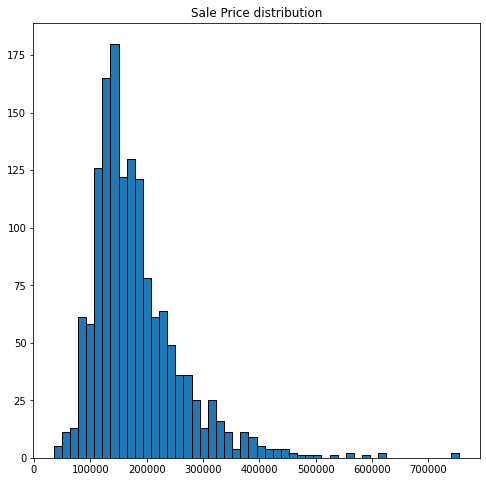

In [4]:
plt.figure(figsize = (8, 8))
plt.hist(df['SalePrice'], bins = 50, edgecolor = 'black')
plt.title("Sale Price distribution")
plt.show()

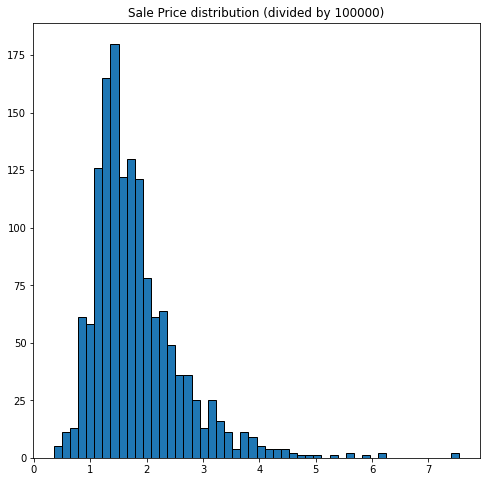

In [5]:
plt.figure(figsize = (8, 8))
plt.hist(df['SalePrice']/100000, bins = 50, edgecolor = 'black')
plt.title("Sale Price distribution (divided by 100000)")
plt.show()

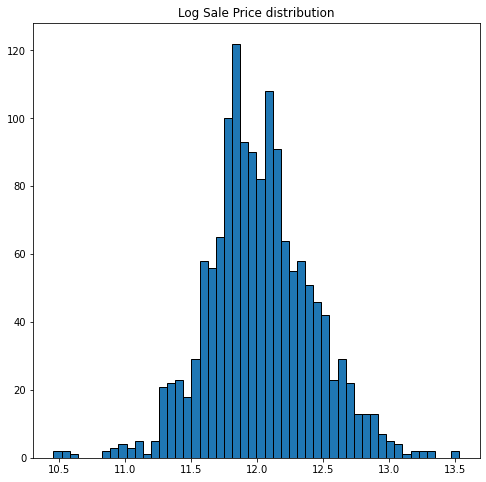

In [6]:
###Using log transform to accurately predict the sale price in the dense part, not the tails
##The evaluation uses the log price too
plt.figure(figsize = (8, 8))
plt.hist(np.log(df['SalePrice']), bins = 50, edgecolor = 'black')
plt.title("Log Sale Price distribution")
plt.show()

# Label features

### Create box plots for all labels features

In [7]:
df.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [8]:
sp_60 = np.log(df.copy().loc[df['MSSubClass'] == 60]['SalePrice'].values)
sp_20 = np.log(df.copy().loc[df['MSSubClass'] == 20]['SalePrice'].values)
boxes = [sp_60]

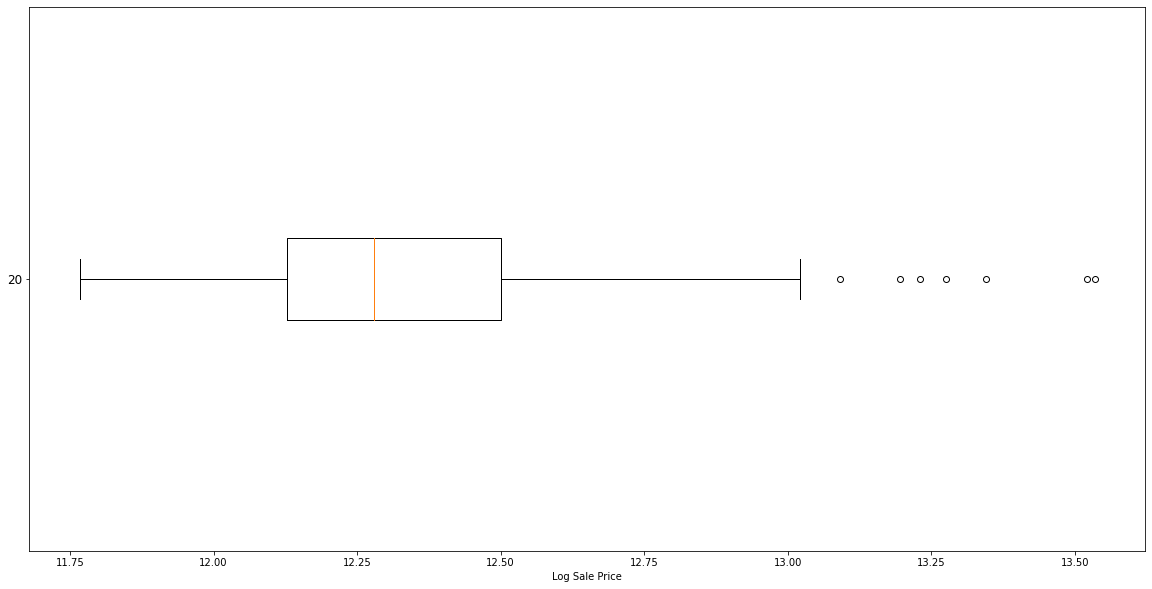

In [9]:
plt.figure(figsize = (20,10))
plt.boxplot(boxes, vert = False)
plt.yticks([1], labels = [20], fontsize = 12)
plt.xlabel('Log Sale Price')
plt.show()

In [10]:
def box_plot_generator(column):
    labels = df[column].unique()
    if type(labels[0]) == np.int64:
        labels = np.sort(labels)
    boxes = []
    for i in range(len(labels)):
        ##Null values are nan, which is a float
        if type(labels[i]) == float:
            labels[i] = 'None'
            label_sales = np.log(df.loc[df[column].isnull()]['SalePrice'].values)
        else:
            label_sales = np.log(df.loc[df[column] == labels[i]]['SalePrice'].values)
        boxes.append(label_sales)
    
    ticks = [i+1 for i in range(len(labels))]
    plt.figure(figsize = (18,8))
    plt.boxplot(boxes, vert = False)
    plt.yticks(ticks, labels, fontsize = 12)
    plt.ylabel(column)
    plt.xlabel('Log Sale Price')
    plt.title(column + ' vs. Log Sale Price')
    plt.show()

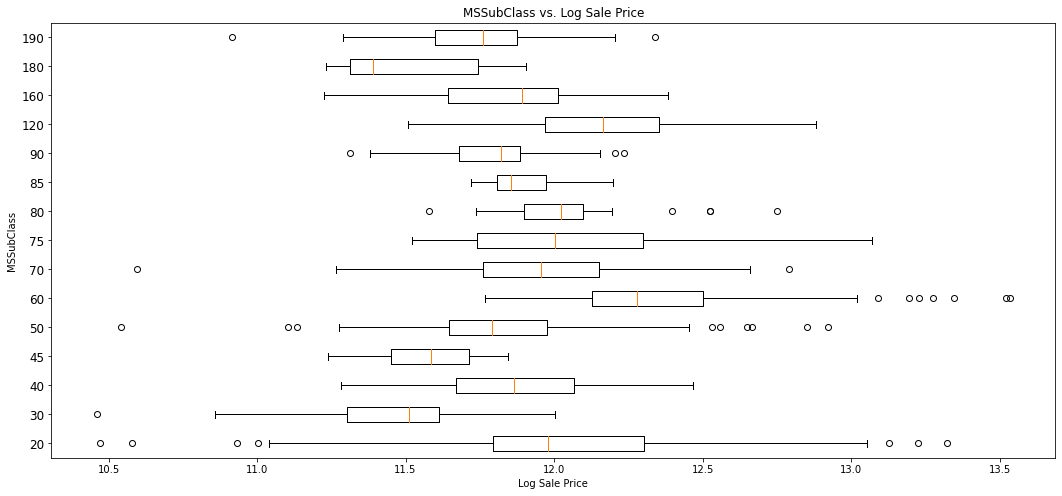

In [11]:
box_plot_generator('MSSubClass')

#### Generate box plots for all labels

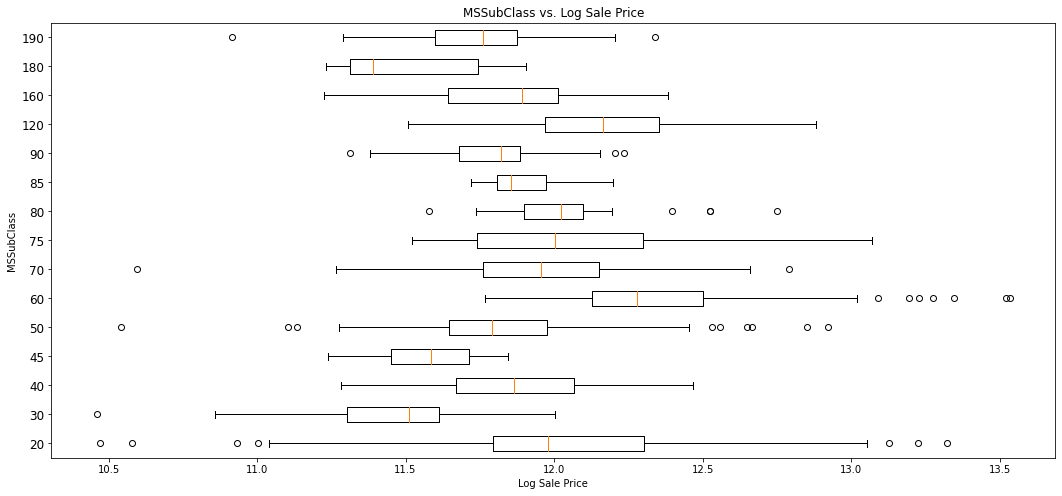

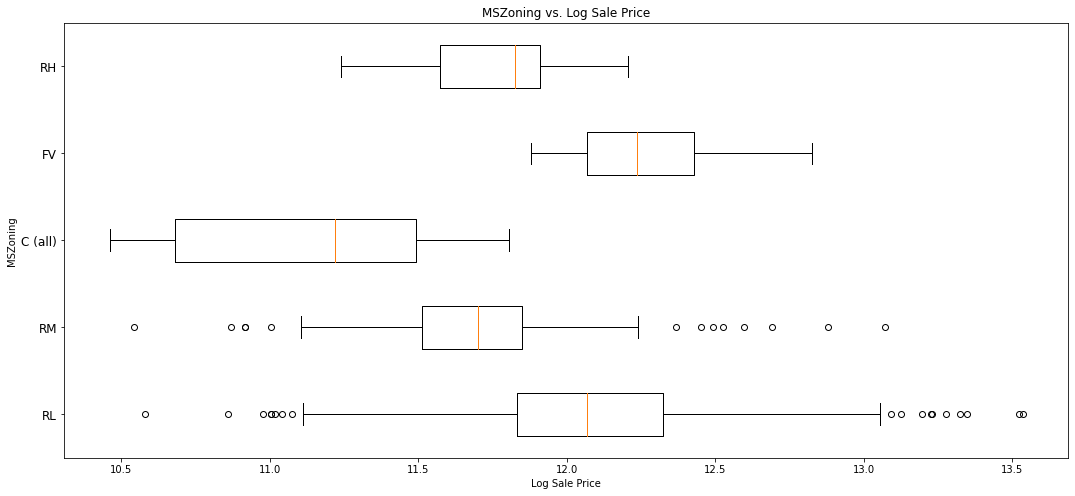

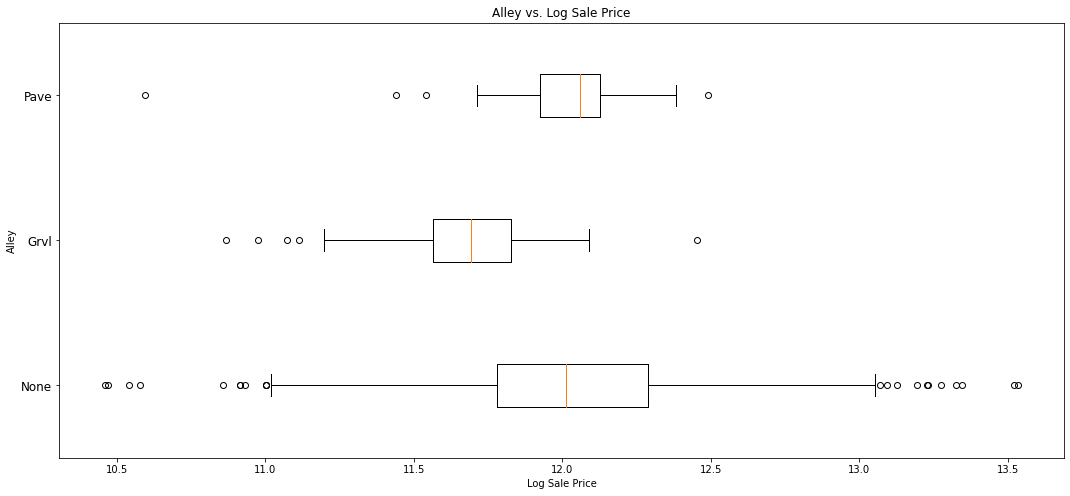

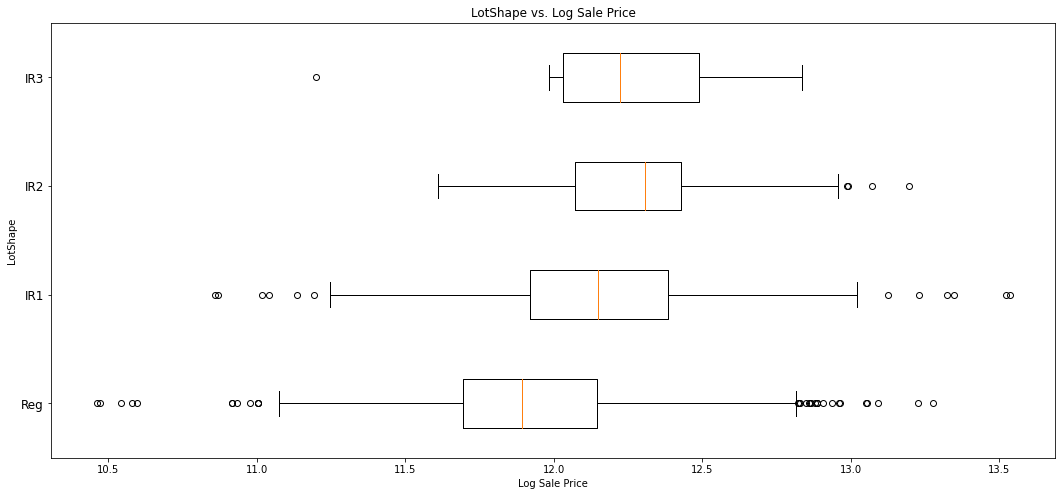

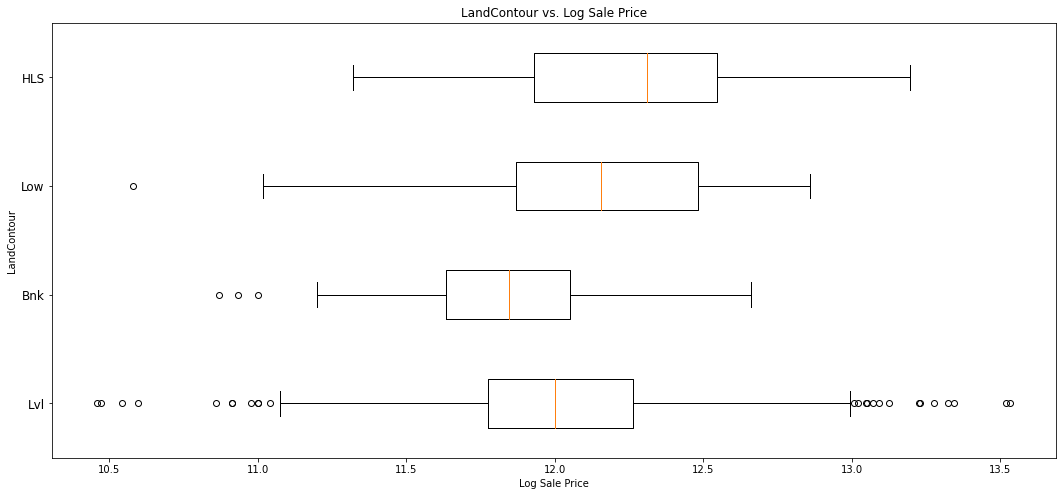

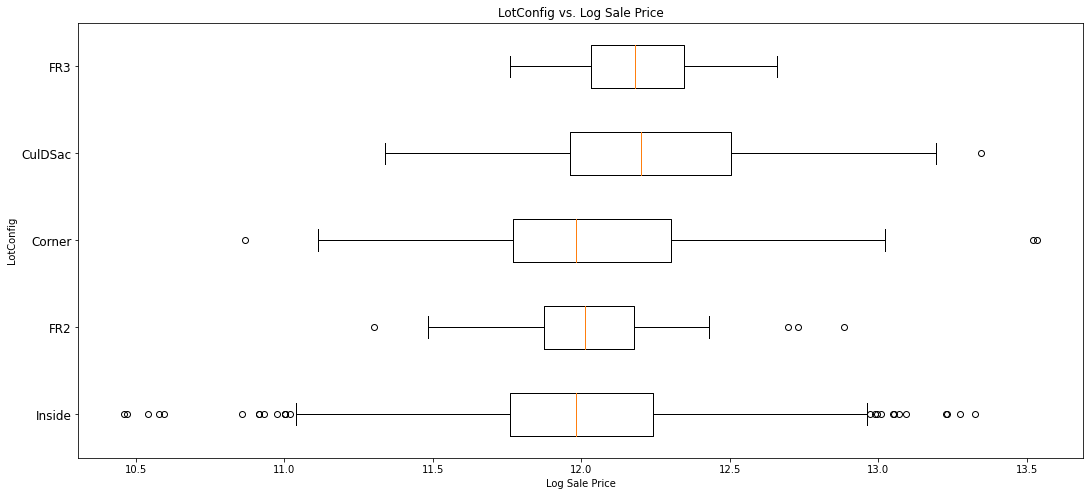

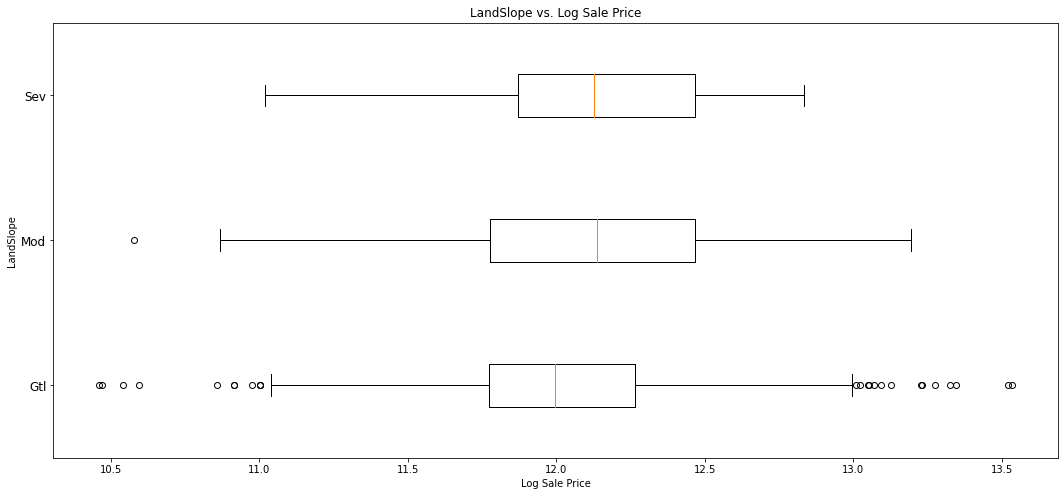

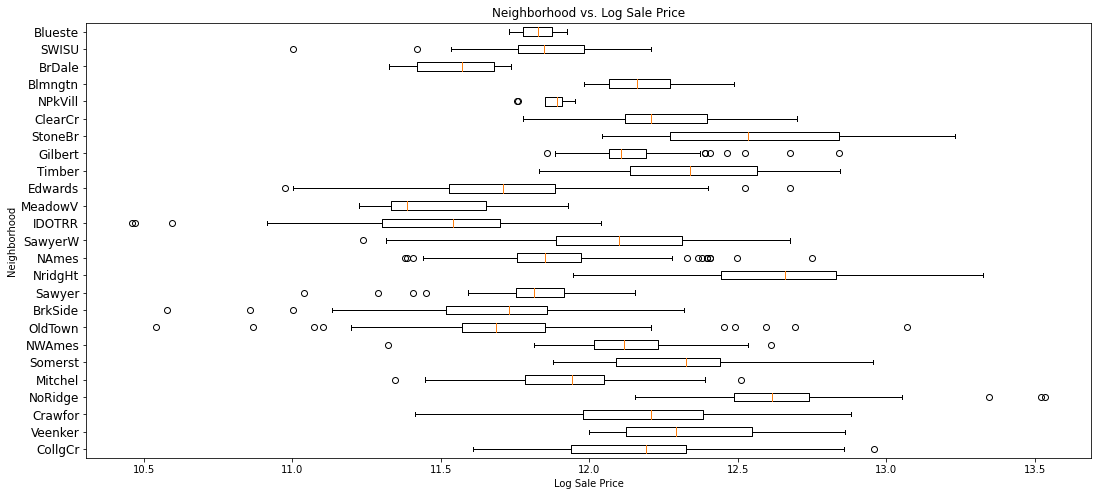

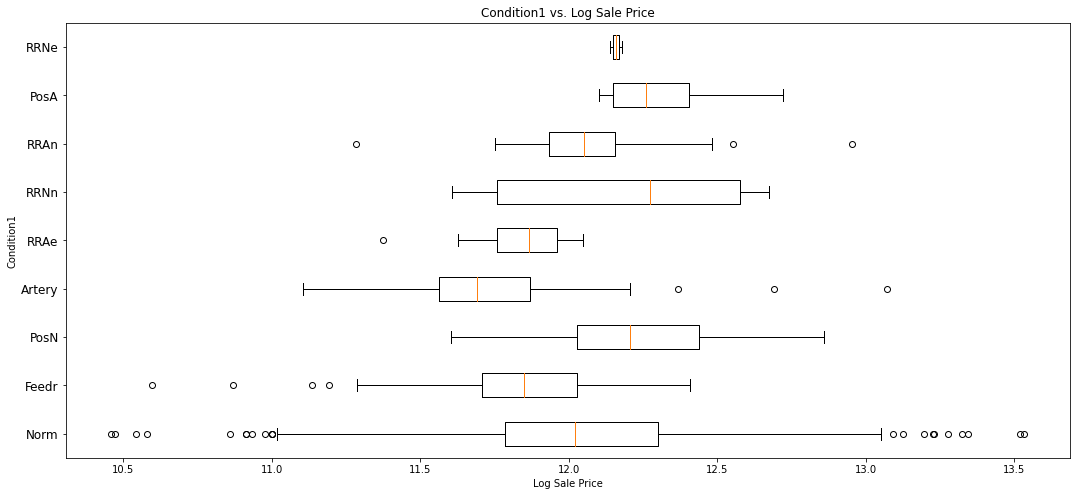

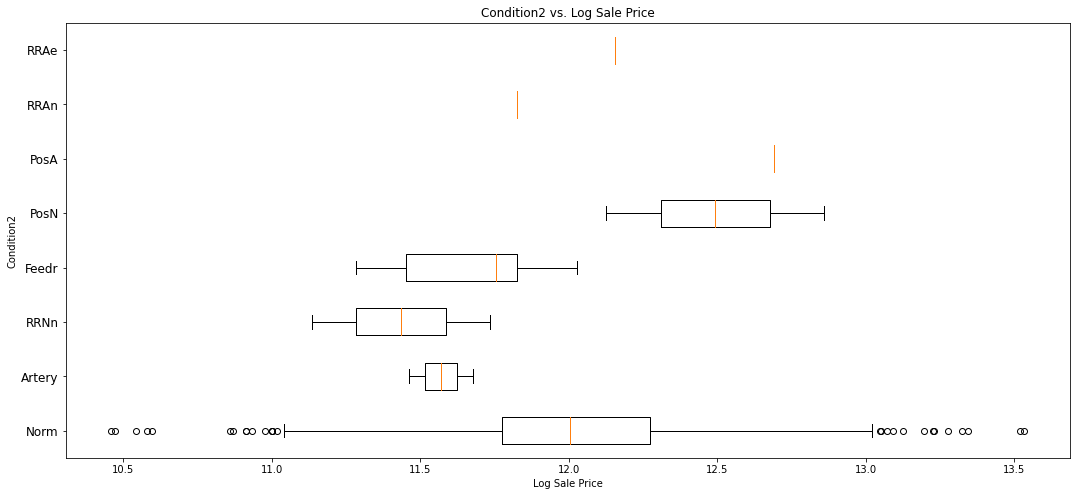

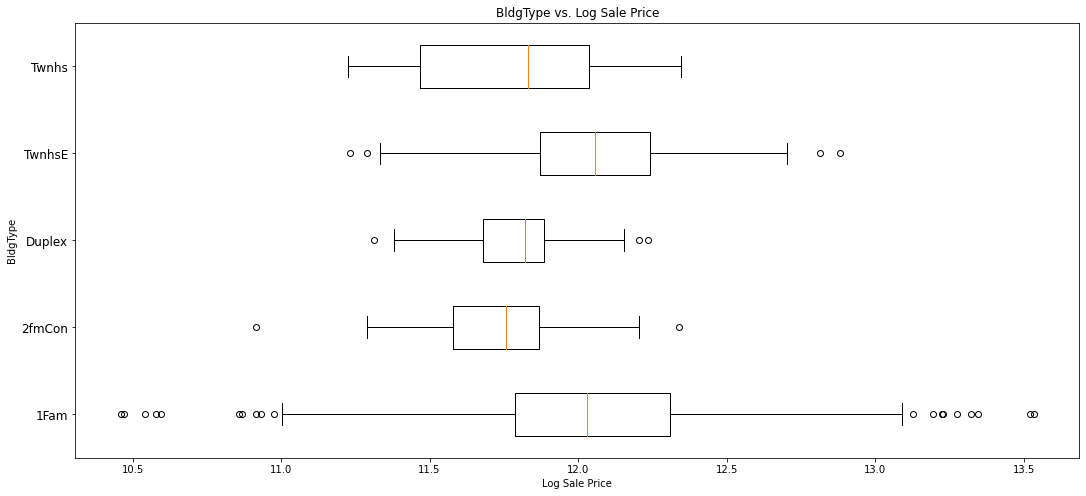

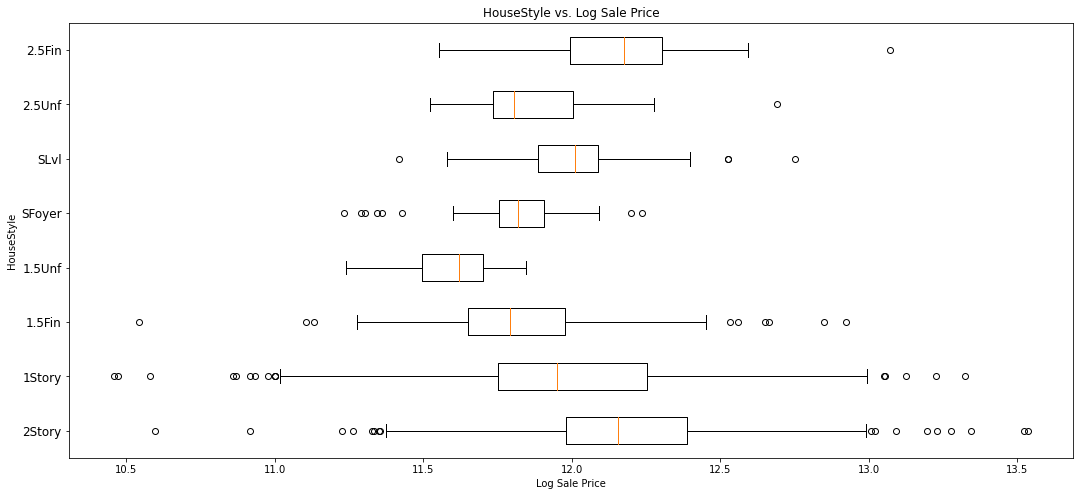

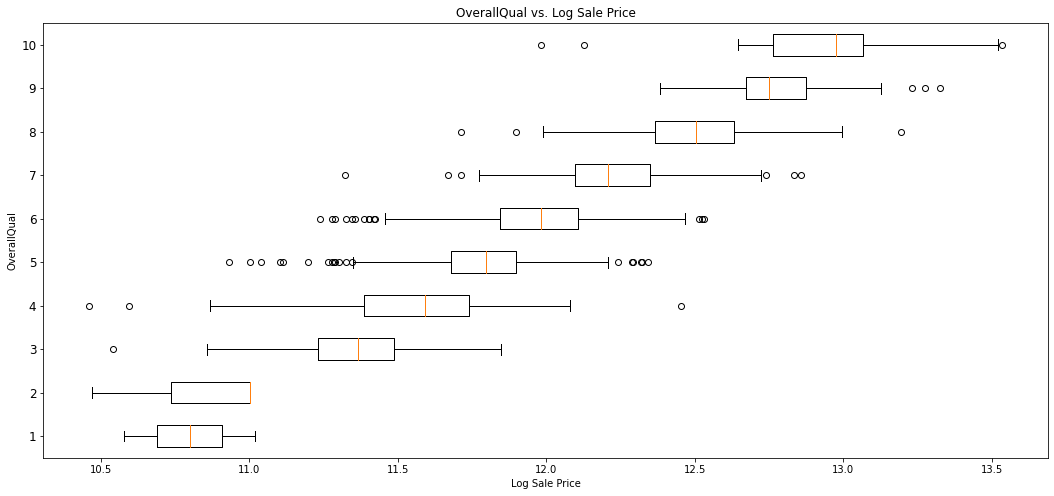

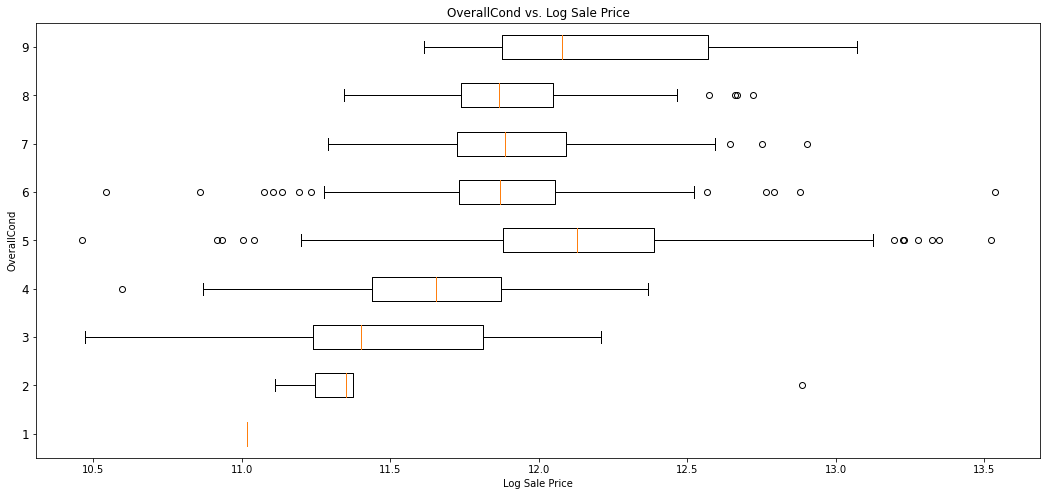

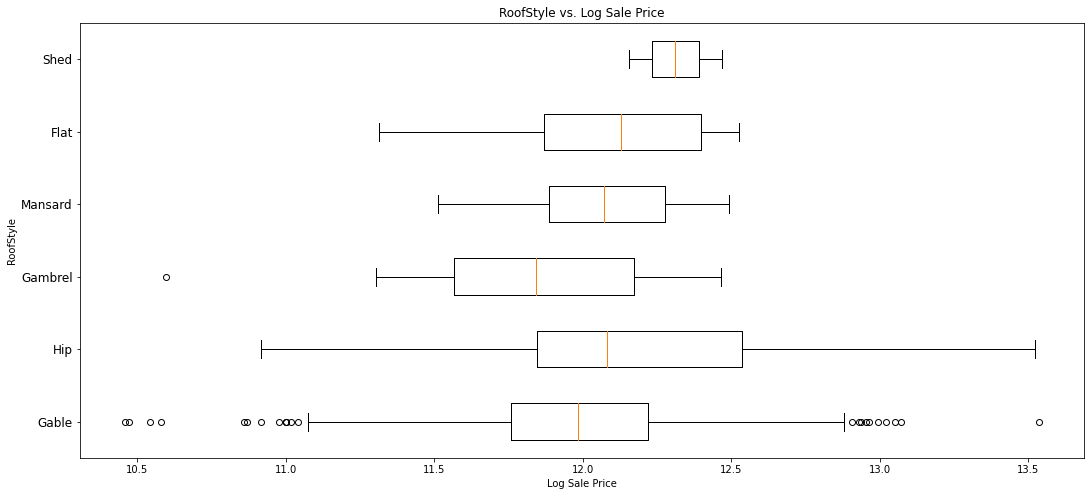

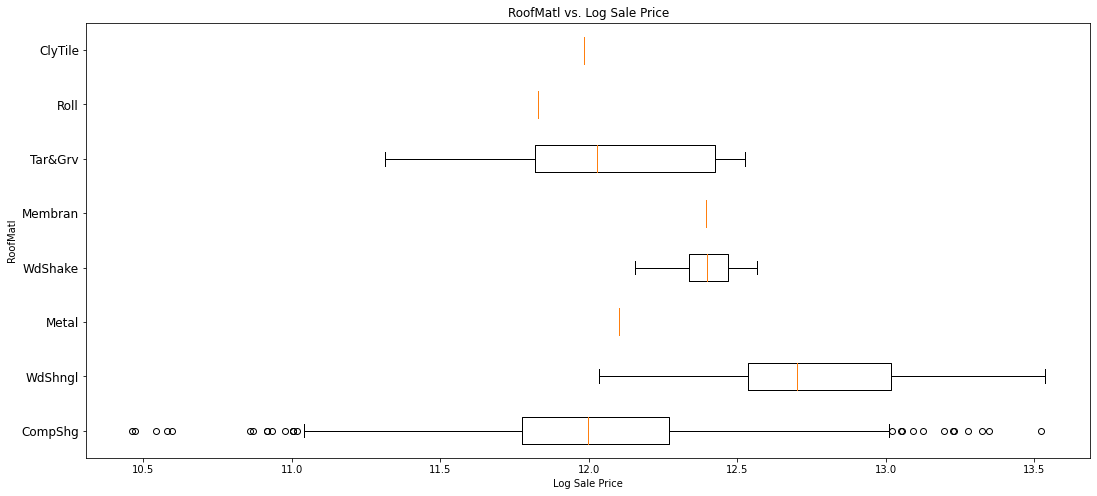

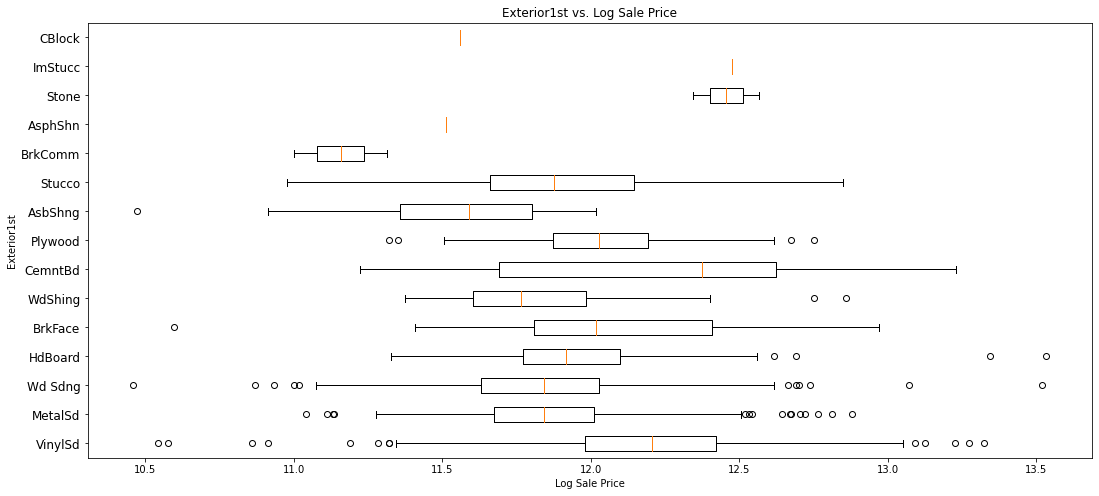

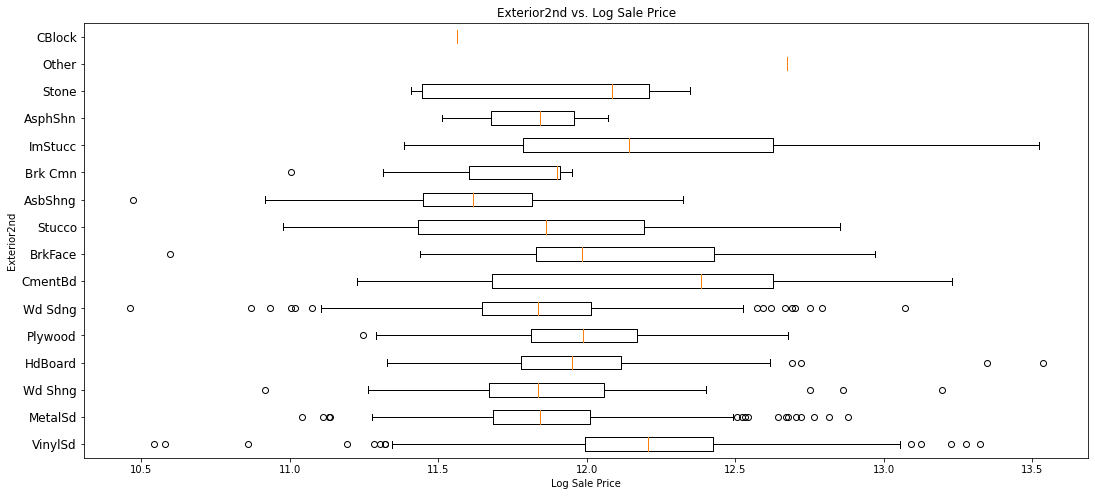

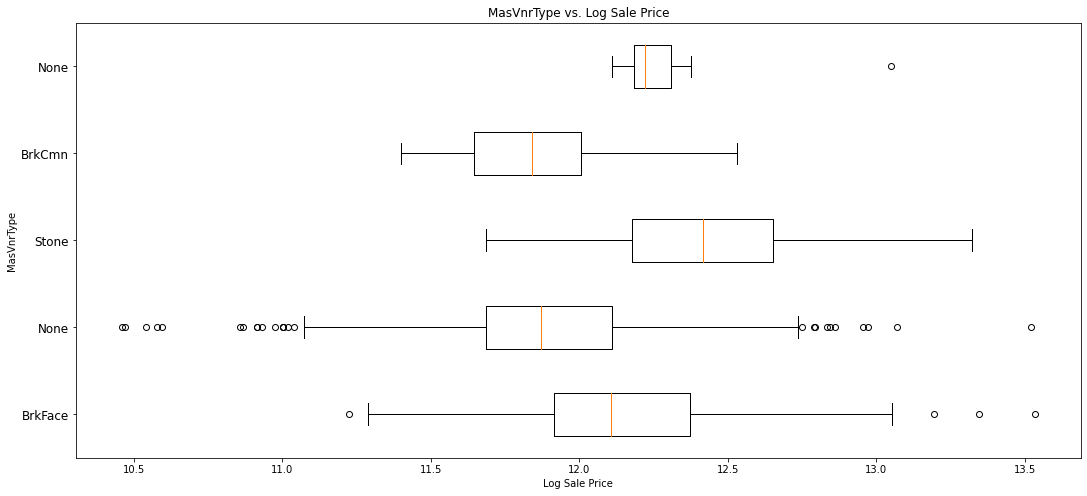

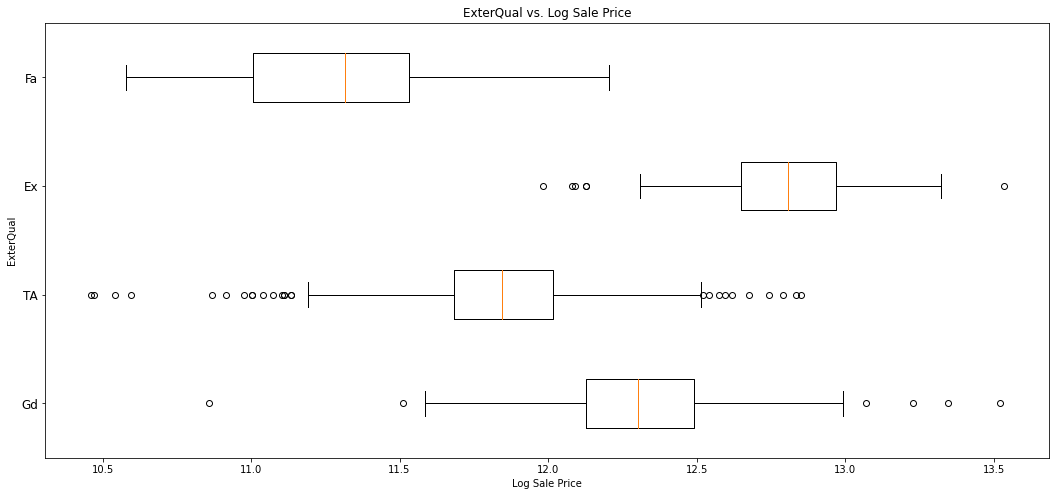

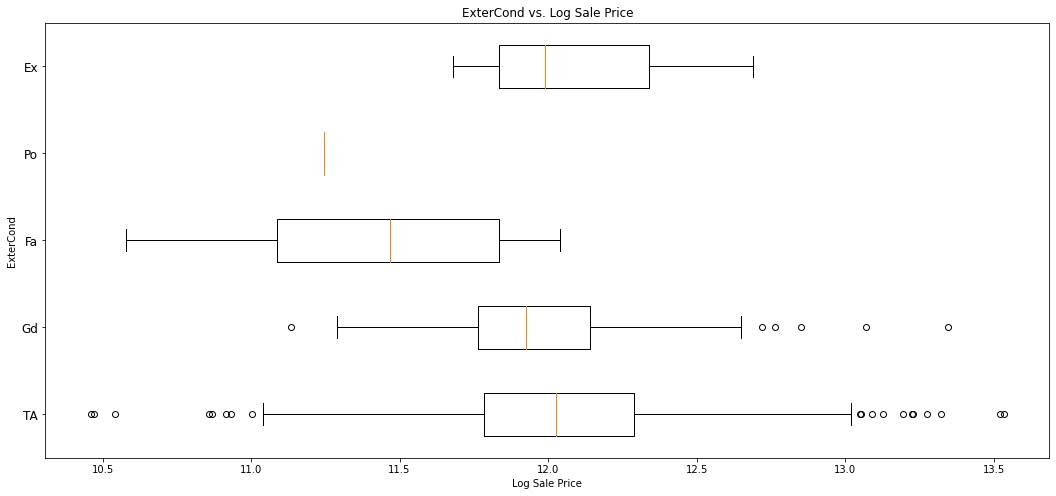

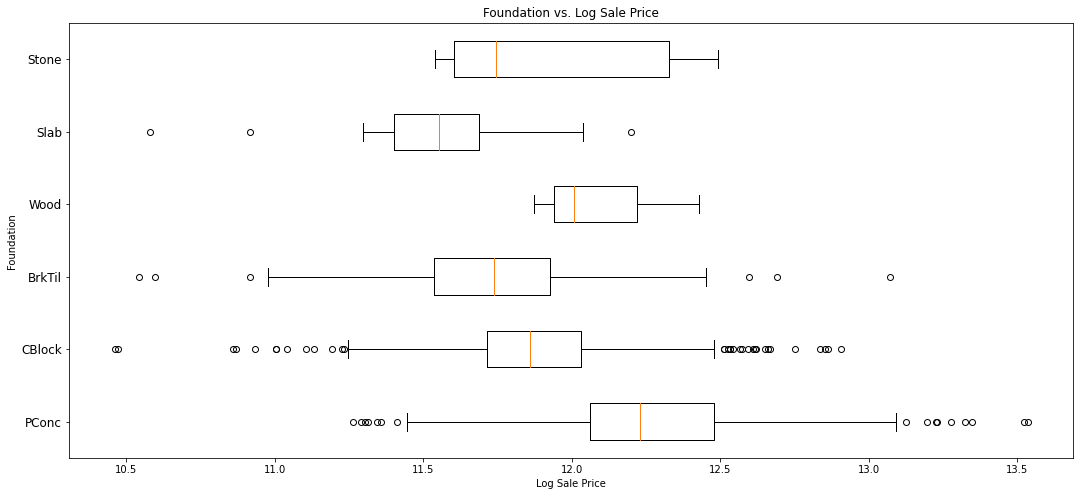

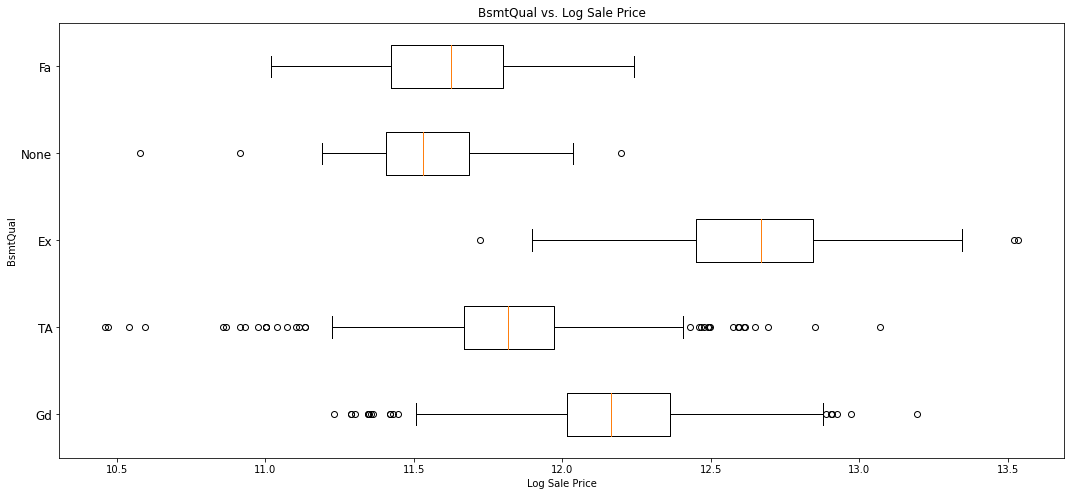

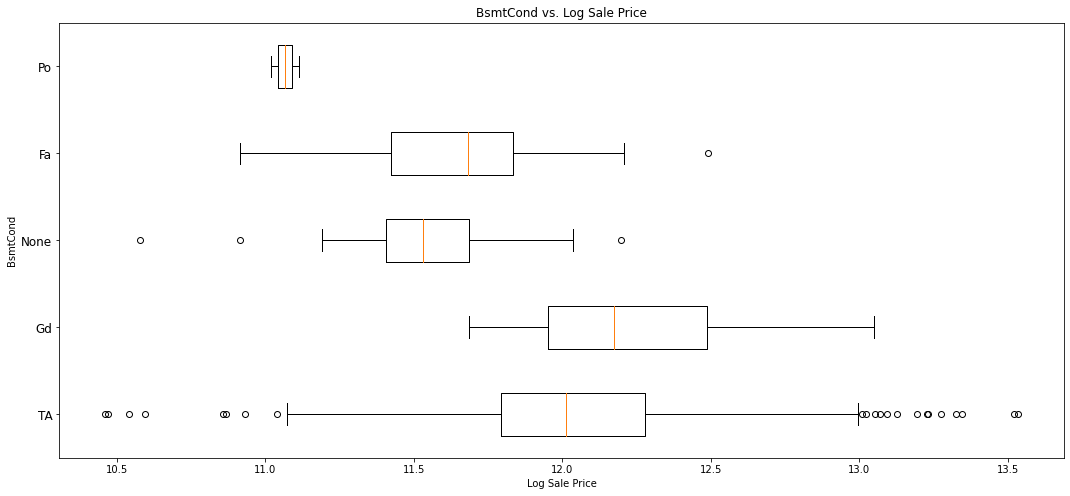

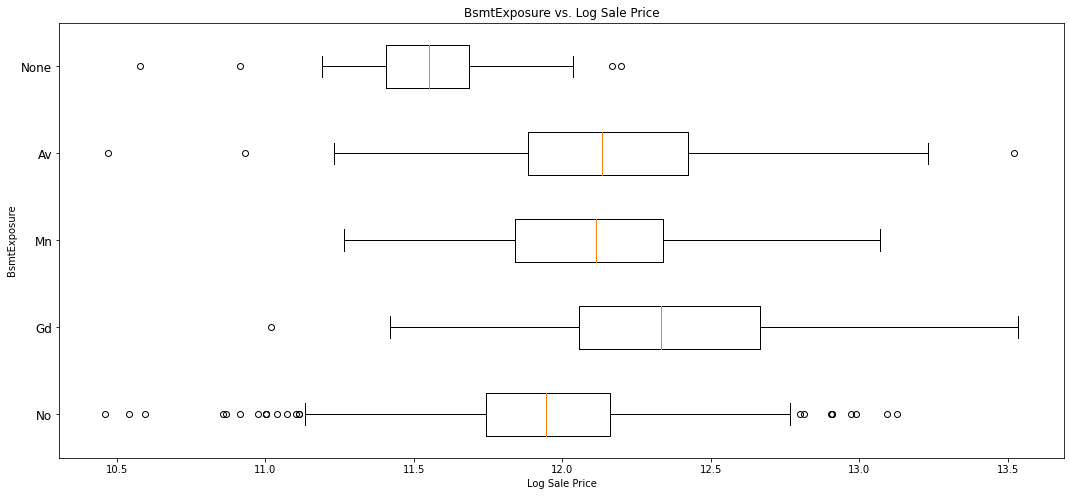

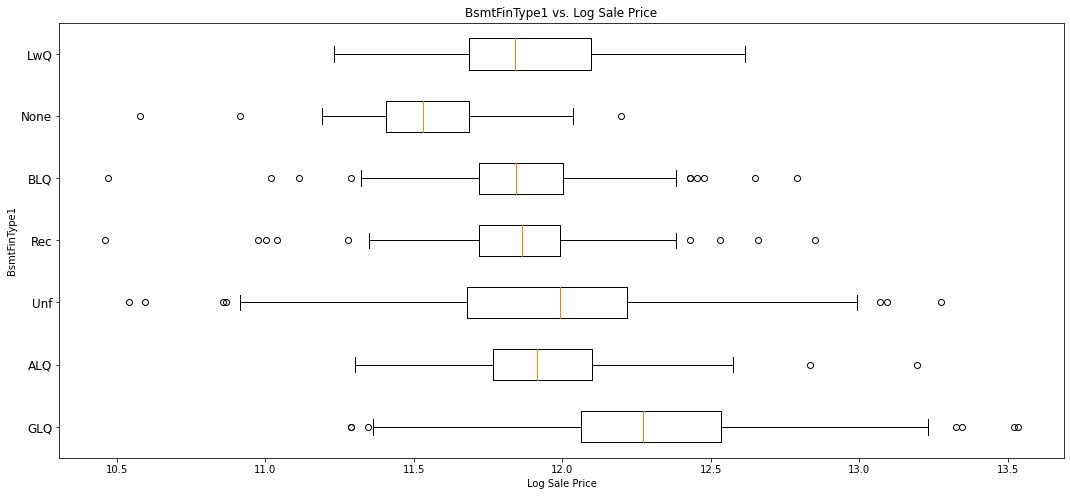

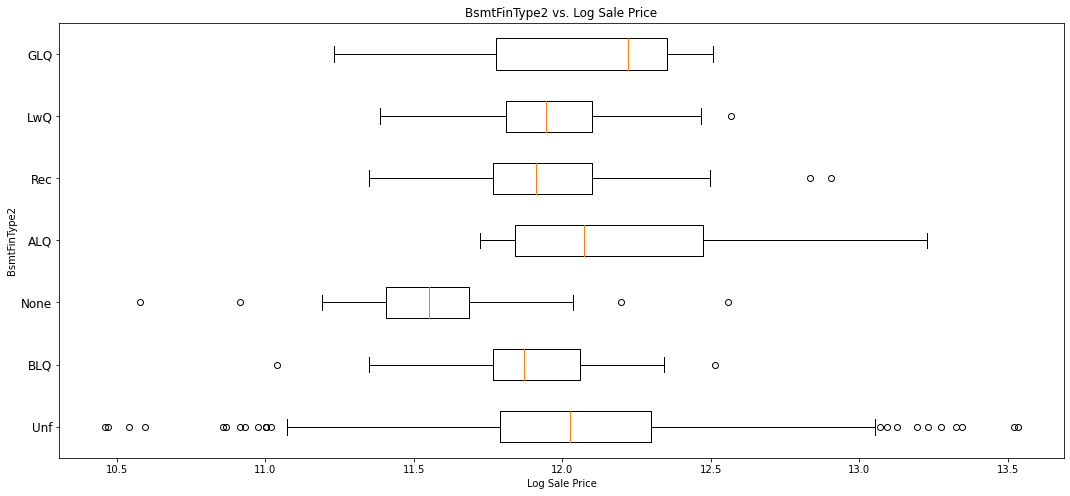

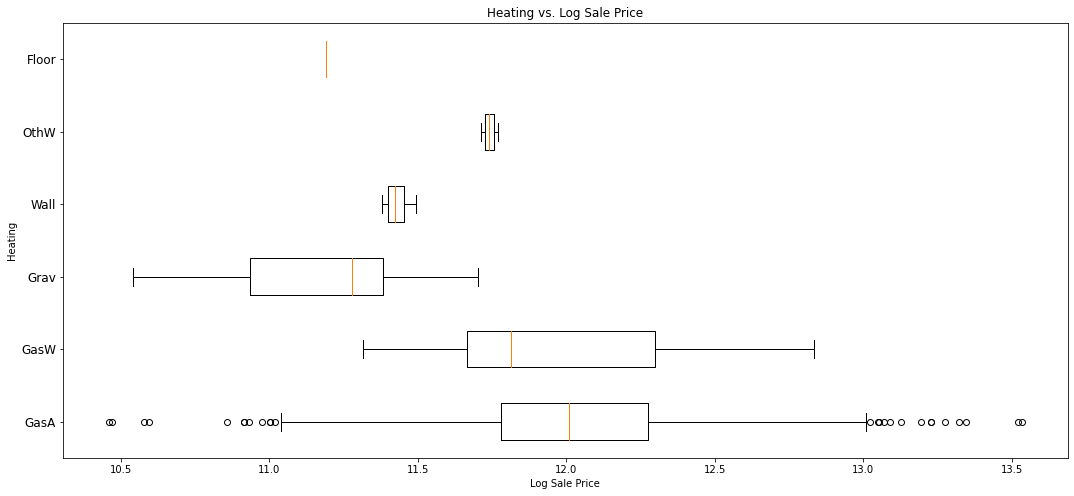

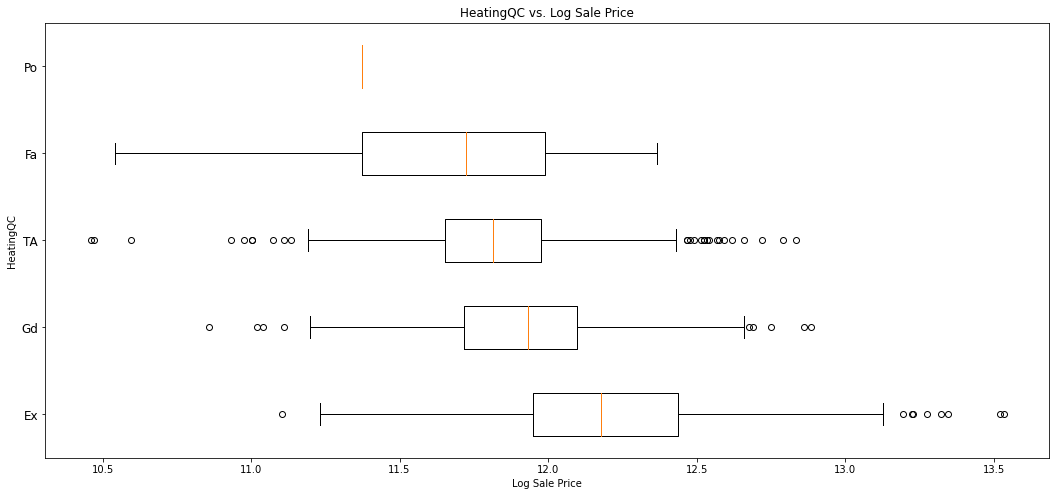

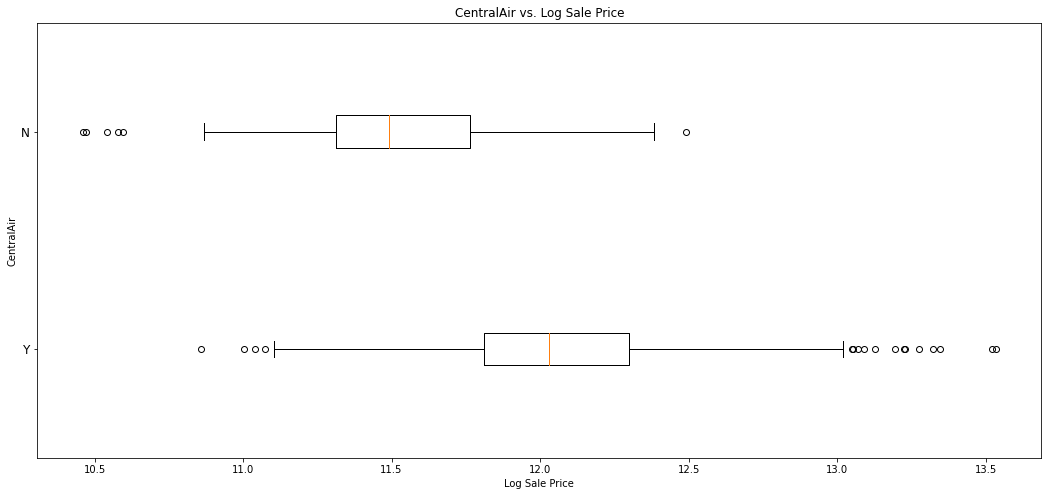

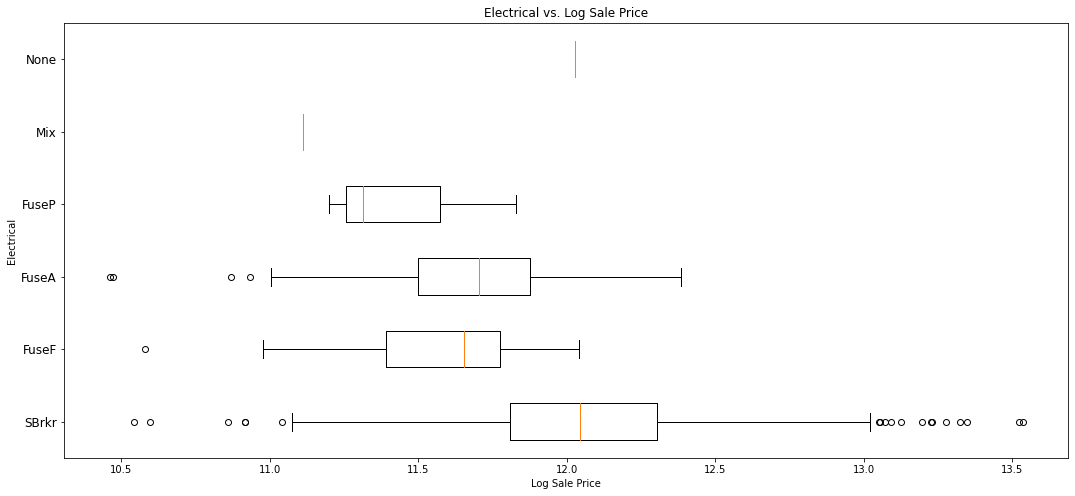

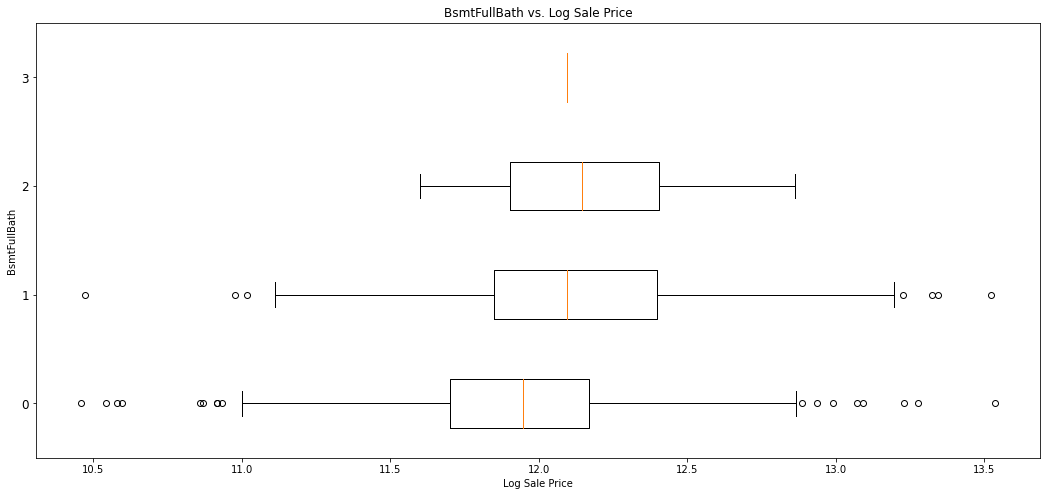

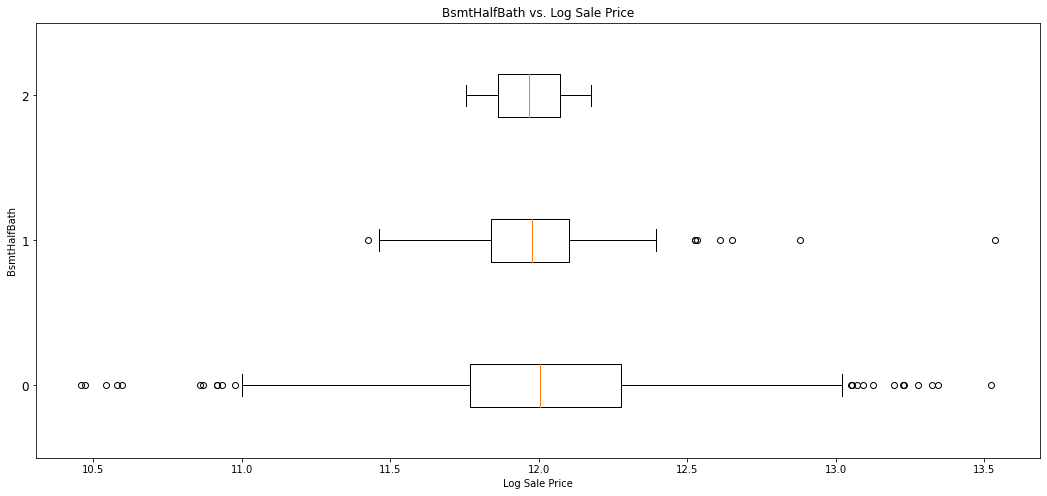

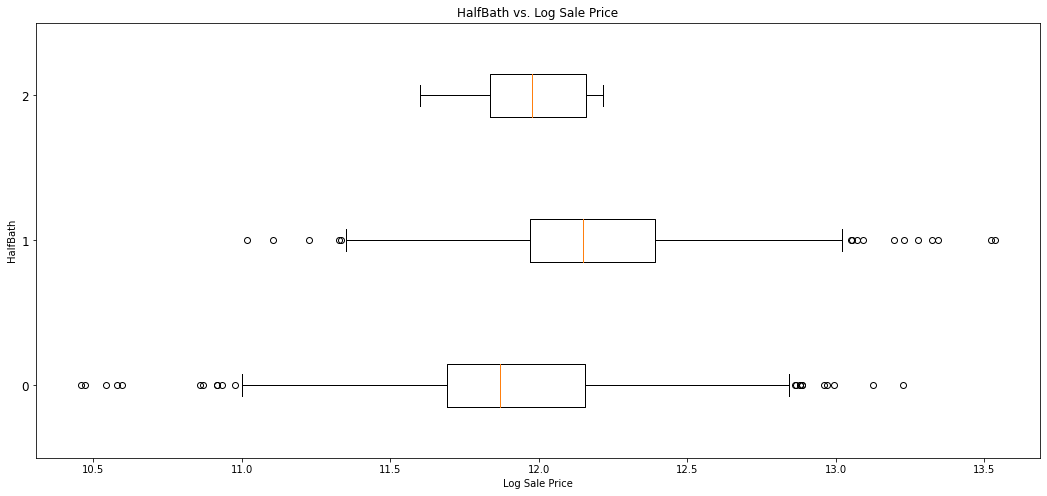

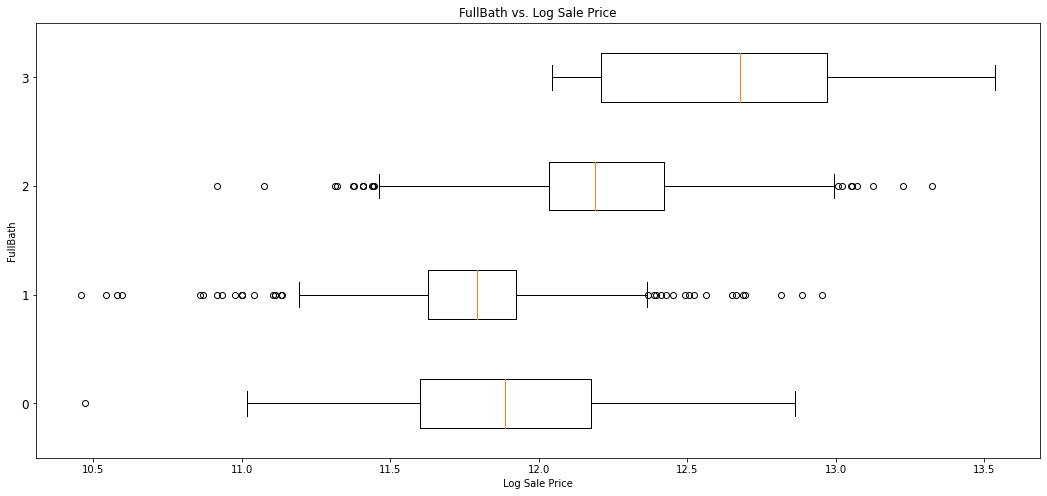

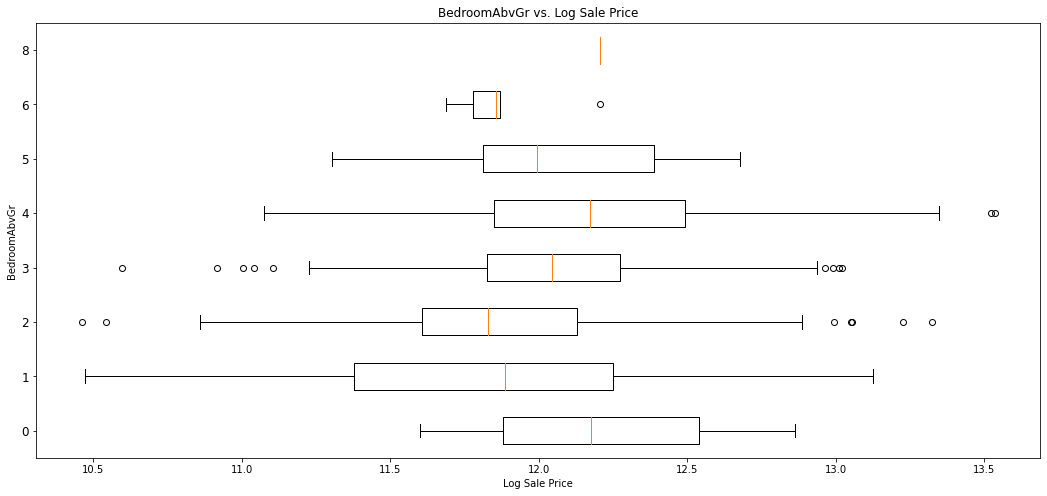

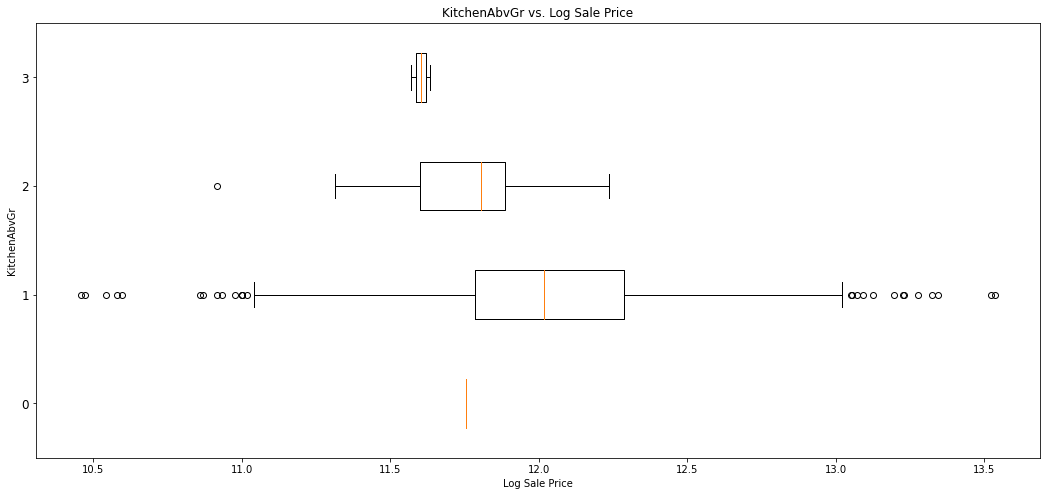

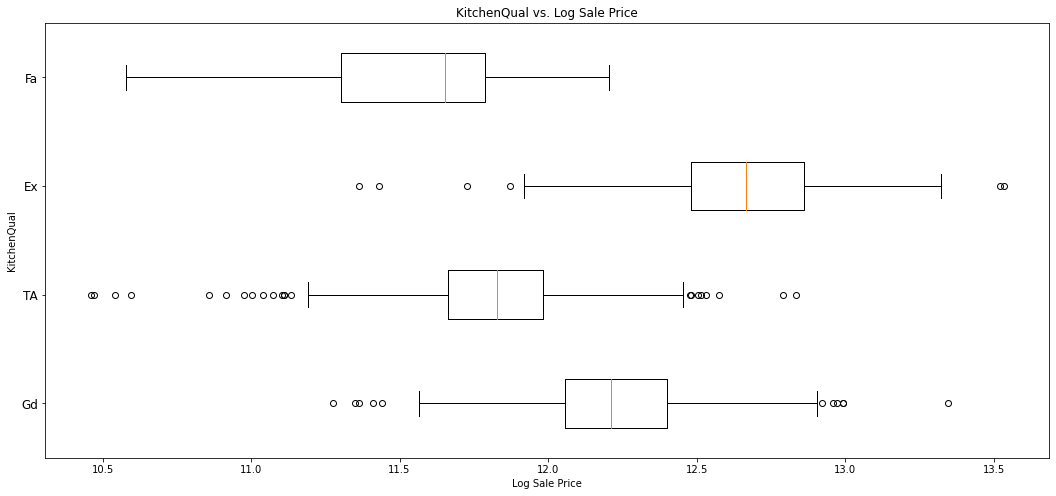

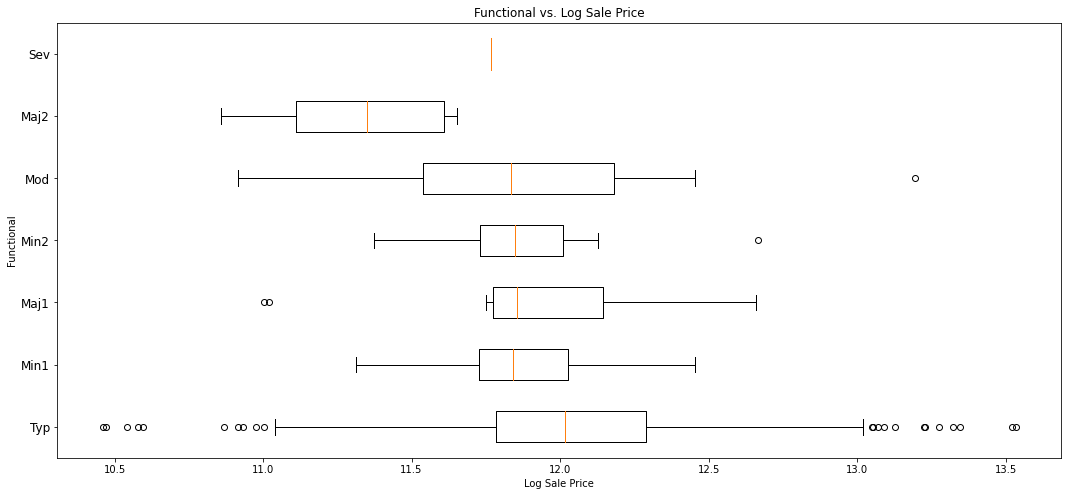

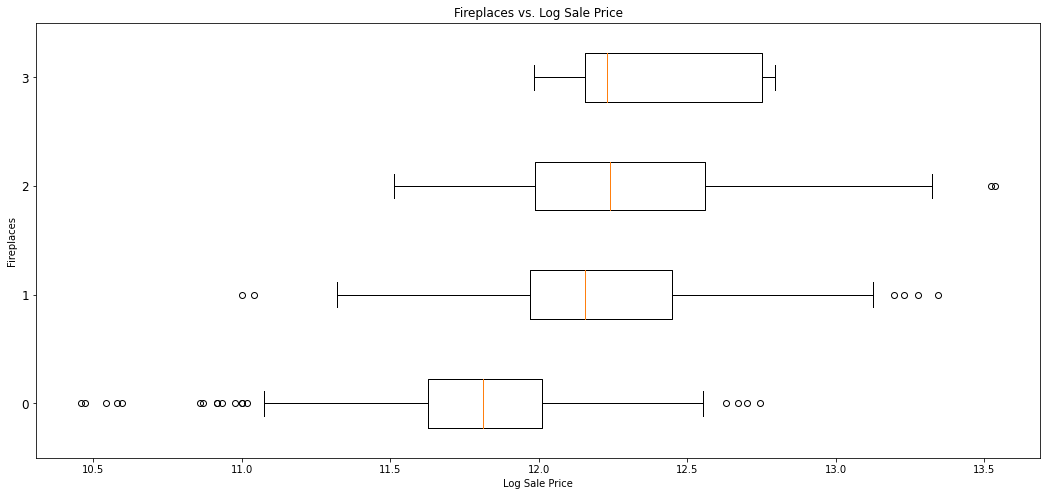

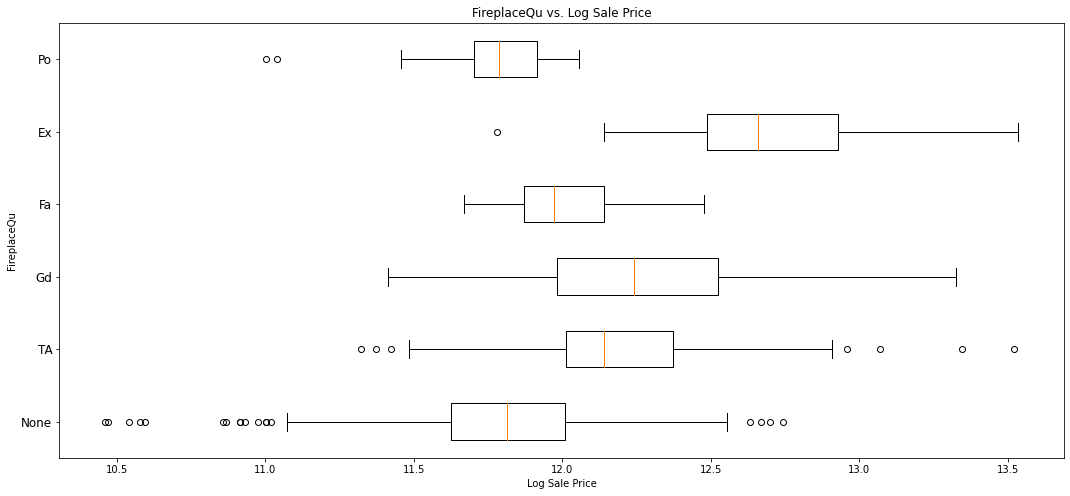

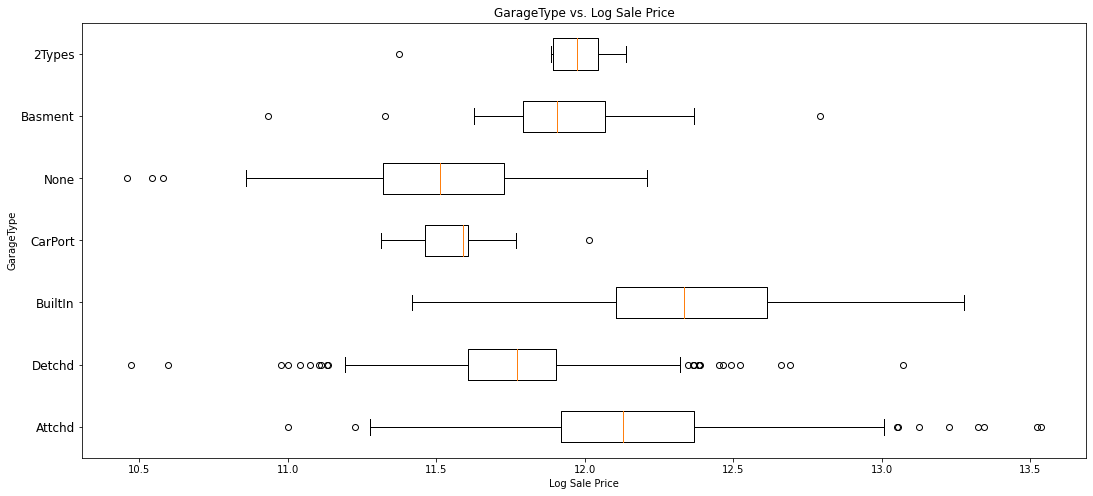

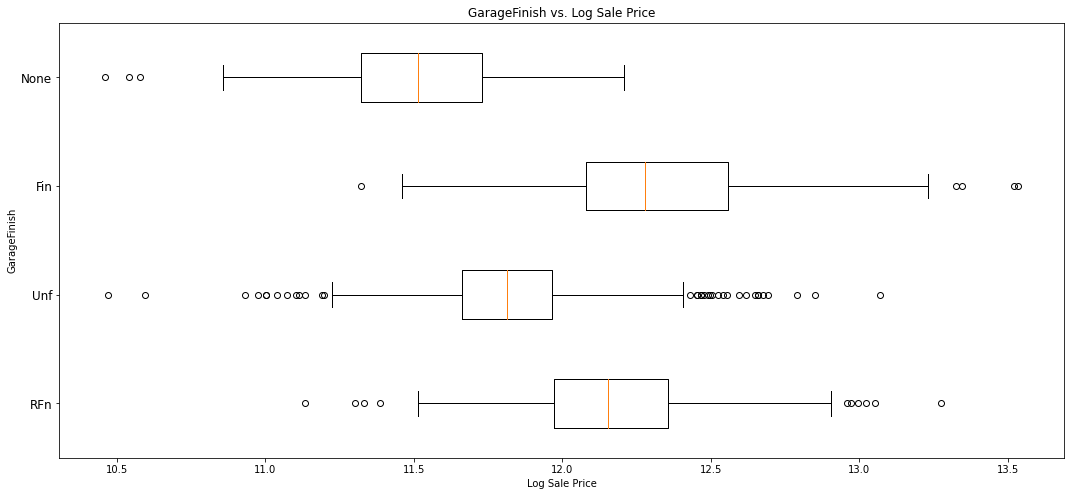

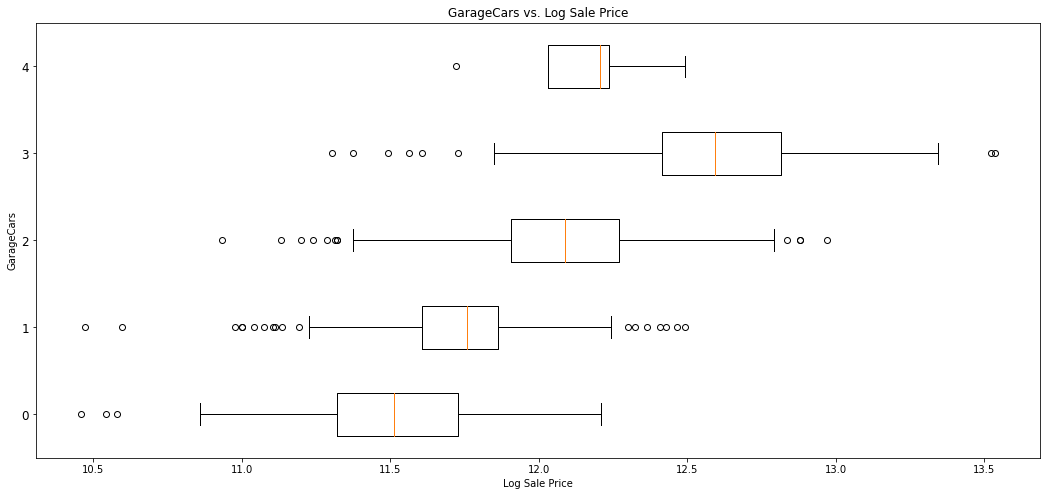

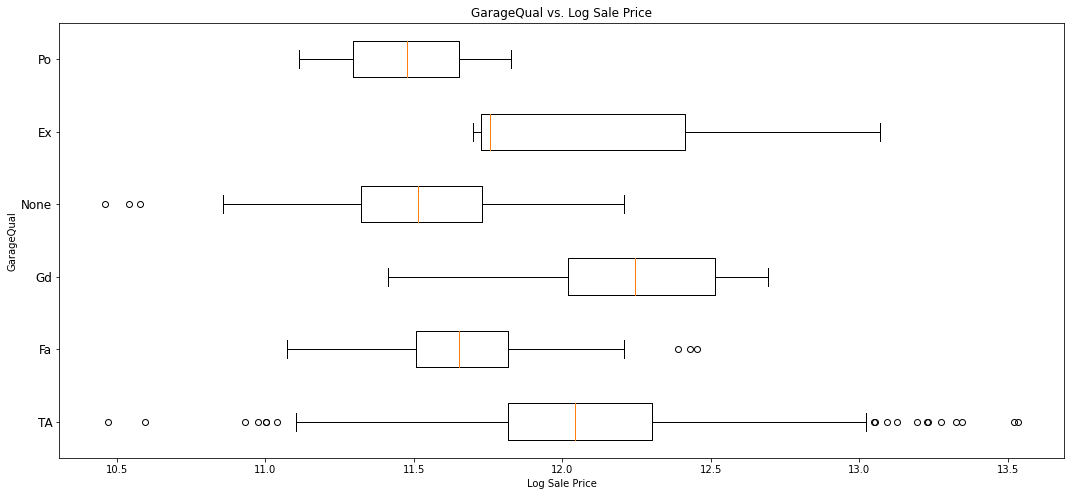

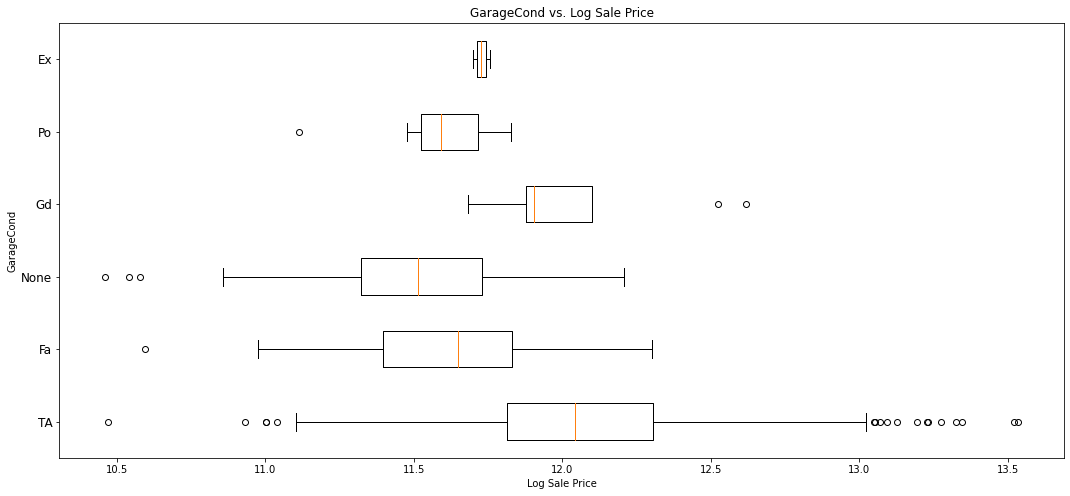

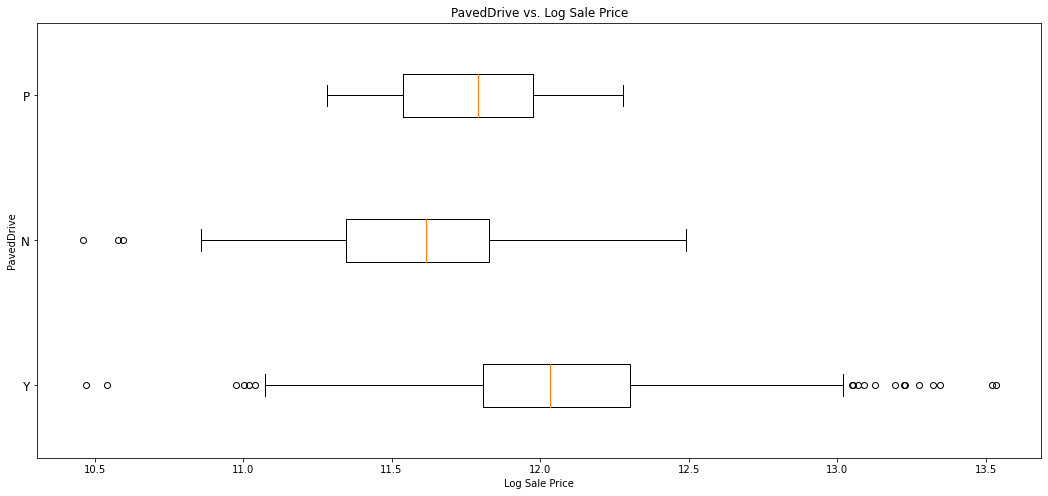

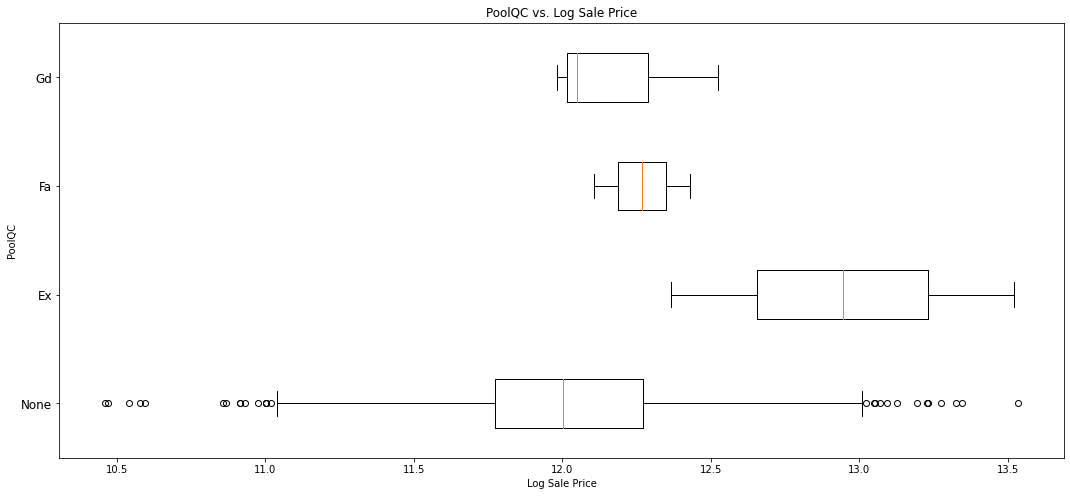

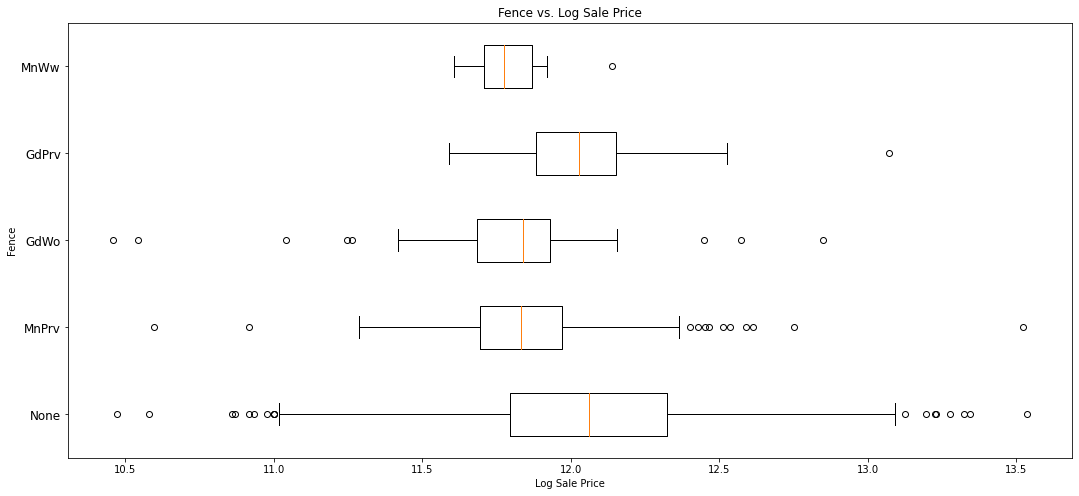

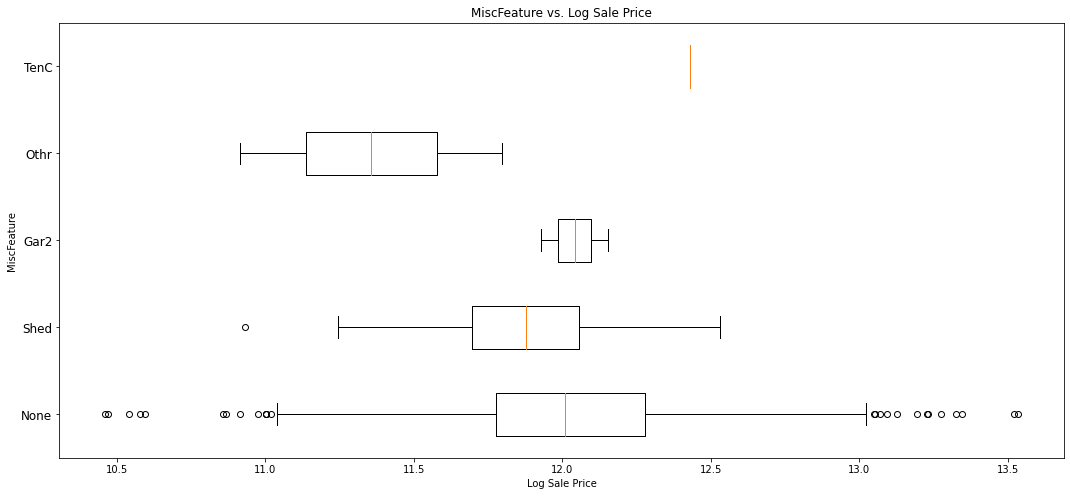

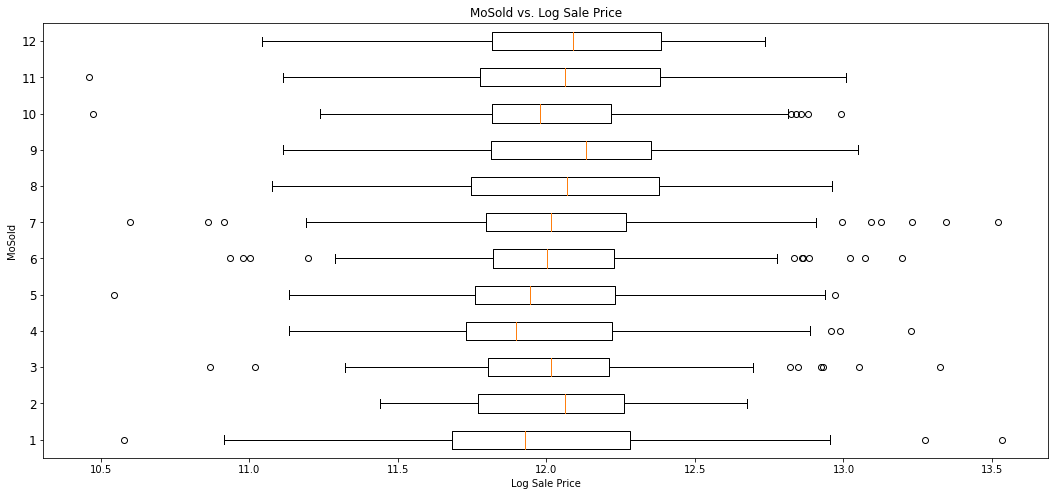

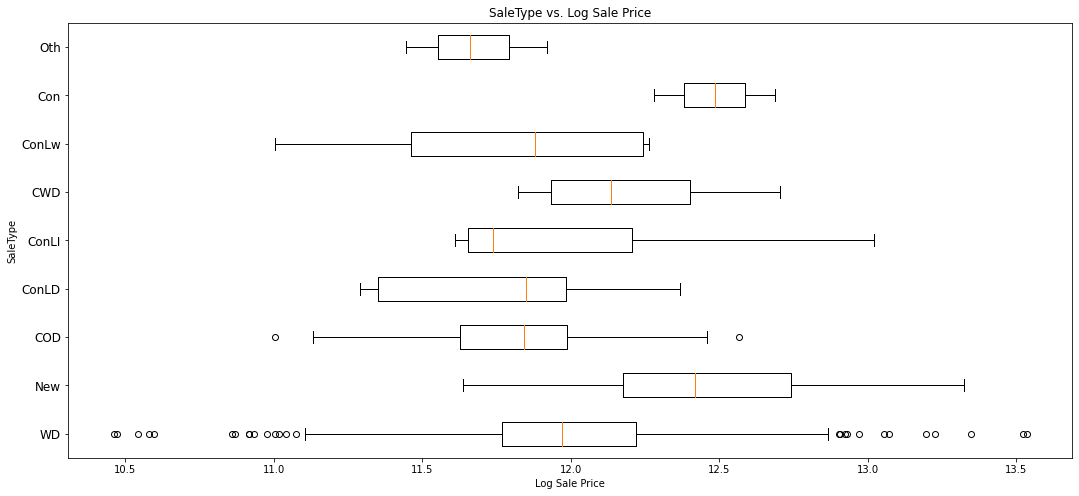

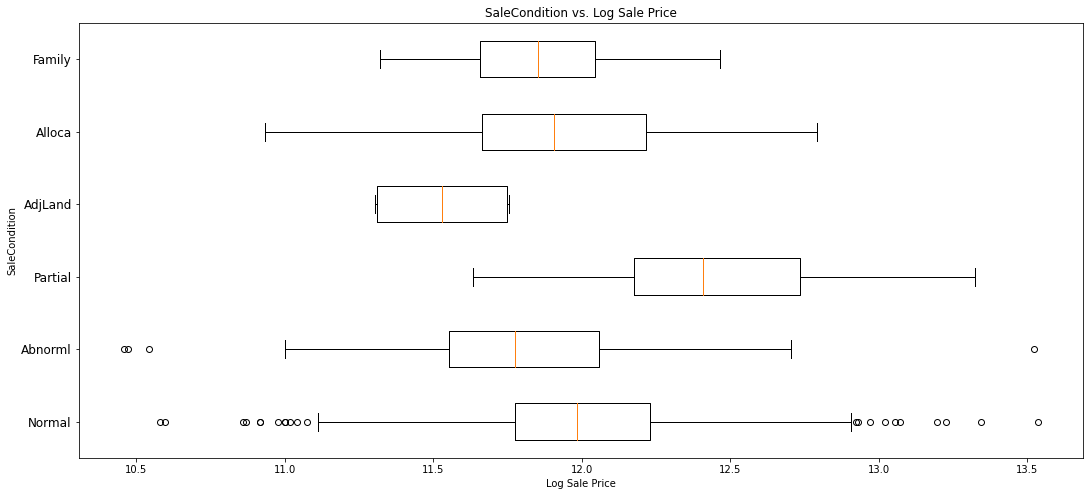

In [12]:
##MSSubClass: a very specific type of house
##BldgType: a general type of house
##Choose features to conduct one-way ANOVA (ANOVA requires that the residuals are approximately normally distributed 
##(Shapiro-Wilks test) and homogeneity of variances (Brown-Forsythe test))
##ANOVA will help us notice that which label feature is important to the sale price 
##Choose features based on boxplots visualization

##'MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
##'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 
##'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
##'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
##'HalfBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
##'KitchenQual', 'Functional', 'Fireplaces', FireplaceQu', 'GarageType', 'GarageFinish', , 'GarageCars', 'GarageQual', 
##'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'

label_columns = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
                'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 
                'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
                'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'FullBath', 'BedroomAbvGr', 
                'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                'MoSold', 'SaleType', 'SaleCondition']

for i in range(len(label_columns)):
    box_plot_generator(label_columns[i])

### Shapiro-Wilk test for normality

In [13]:
##Check if the Log sale price is normal, 95% CI
W_stat, p_value = stats.shapiro(np.log(df['SalePrice']))
if p_value < 0.05:
    print("The data comes from a normal distribution, p_value = {}".format(round(p_value, 9)))
else:
    print("The data doesn't come from a normal distribution, p_value = {}".format(round(p_value, 9)))

The data comes from a normal distribution, p_value = 1.15e-07


### One_way ANOVA

In [14]:
##Based on the box plots, most categorical variables within each feature have different variances
##Some plots are wide (Higher variance) Some are not (lower variance)
##Check for CI 80%, this is where we decide which label feature to use
def ANOVA_oneway_median(column):
    labels = df[column].unique()
    if type(labels[0]) == np.int64:
        labels = np.sort(labels)
    boxes = []
    for i in range(len(labels)):
        ##Null values are nan, which is a float
        if type(labels[i]) == float:
            labels[i] = 'None'
            label_sales = np.log(df.loc[df[column].isnull()]['SalePrice'].values)
        else:
            label_sales = np.log(df.loc[df[column] == labels[i]]['SalePrice'].values)
        boxes.append(label_sales)
    F_stat, pvalue = oneway.test_scale_oneway(boxes, method = "bf", center = "median")
    return pvalue

In [15]:
columns1 = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
            'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 
            'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
            'HalfBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
            'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']

categorical_features1 = []
for column in columns1:
    pvalue = ANOVA_oneway_median(column)
    if pvalue < 0.20:
        categorical_features1.append(column)

C:\Users\Khoatruong\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\stats\oneway.py:677: RuntimeWarning: Degrees of freedom <= 0 for slice
  vars_ = np.array([x.var(ddof=1) for x in args])
C:\Users\Khoatruong\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
categorical_features1

['MSSubClass',
 'MSZoning',
 'Alley',
 'LandContour',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'RoofStyle',
 'Foundation',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtHalfBath',
 'HalfBath',
 'FullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MoSold']

In [17]:
##Special case for OverallQual since variance here is almost the same
column = 'OverallQual'
labels = df[column].unique()
if type(labels[0]) == np.int64:
    labels = np.sort(labels)
boxes = []
for i in range(len(labels)):
    ##Null values are nan, which is a float
    if type(labels[i]) == float:
        labels[i] = 'None'
        label_sales = np.log(df.loc[df[column].isnull()]['SalePrice'].values)
    else:
        label_sales = np.log(df.loc[df[column] == labels[i]]['SalePrice'].values)
    boxes.append(label_sales)
F_stat, pvalue = oneway.test_scale_oneway(boxes, method = "equal", center = "mean")
pvalue

0.0017159808572560604

In [18]:
len(label_columns)

53

In [19]:
len(categorical_features1)

30

In [20]:
remaining_labels = list(set(columns1) - set(categorical_features1))

In [21]:
##Since we notice that the variances can be equal for some features and they also have different mean
##Use anova but assume equal variances and center mean
def ANOVA_oneway_mean(column):
    labels = df[column].unique()
    if type(labels[0]) == np.int64:
        labels = np.sort(labels)
    boxes = []
    for i in range(len(labels)):
        ##Null values are nan, which is a float
        if type(labels[i]) == float:
            labels[i] = 'None'
            label_sales = np.log(df.loc[df[column].isnull()]['SalePrice'].values)
        else:
            label_sales = np.log(df.loc[df[column] == labels[i]]['SalePrice'].values)
        boxes.append(label_sales)
    F_stat, pvalue = oneway.test_scale_oneway(boxes, method = "equal", center = "mean")
    return pvalue

In [22]:
categorical_features2 = []
for column in remaining_labels:
    pvalue = ANOVA_oneway_mean(column)
    if pvalue < 0.20:
        categorical_features2.append(column)

In [23]:
categorical_features2

['GarageQual', 'BsmtQual']

In [24]:
categorical_features = categorical_features1 + categorical_features2
categorical_features

['MSSubClass',
 'MSZoning',
 'Alley',
 'LandContour',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'RoofStyle',
 'Foundation',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtHalfBath',
 'HalfBath',
 'FullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MoSold',
 'GarageQual',
 'BsmtQual']

In [25]:
print("Number of original label features: ", len(label_columns))
print("Chosen label features: ", len(categorical_features))

Number of original label features:  53
Chosen label features:  32


# Numerical features

In [27]:
numerical_columns = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                     '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 
                     'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
                     'YrSold']

In [37]:
##We are looking a log Sale Price
df_reg = df.copy()[numerical_columns + ['SalePrice']]
df_reg['Log Price'] = np.log(df_reg['SalePrice'])
df_reg = df_reg.drop(columns = ['SalePrice'])
df_reg.corr()

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,Log Price
LotArea,1.000000,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,-0.014261,0.257320
YearBuilt,0.014228,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,-0.013618,0.586570
YearRemodAdd,0.013788,0.592855,1.000000,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.035743,0.565608
BsmtFinSF1,0.214103,0.249503,0.128451,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.014359,0.372023
BsmtFinSF2,0.111170,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,0.031706,0.004832
BsmtUnfSF,-0.002618,0.149040,0.181133,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,...,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,-0.041258,0.221985
TotalBsmtSF,0.260833,0.391452,0.291066,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,...,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,-0.014969,0.612134
1stFlrSF,0.299475,0.281986,0.240379,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,...,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,-0.013604,0.596981
2ndFlrSF,0.050986,0.010308,0.140024,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,...,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,-0.028700,0.319300
LowQualFinSF,0.004779,-0.183784,-0.062419,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,...,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.028921,-0.037963


In [38]:
df_reg.corr()['Log Price']

LotArea          0.257320
YearBuilt        0.586570
YearRemodAdd     0.565608
BsmtFinSF1       0.372023
BsmtFinSF2       0.004832
BsmtUnfSF        0.221985
TotalBsmtSF      0.612134
1stFlrSF         0.596981
2ndFlrSF         0.319300
LowQualFinSF    -0.037963
GrLivArea        0.700927
TotRmsAbvGrd     0.534422
GarageYrBlt      0.541073
GarageArea       0.650888
WoodDeckSF       0.334135
OpenPorchSF      0.321053
EnclosedPorch   -0.149050
3SsnPorch        0.054900
ScreenPorch      0.121208
PoolArea         0.069798
MiscVal         -0.020021
YrSold          -0.037263
Log Price        1.000000
Name: Log Price, dtype: float64

In [40]:
##Only want corr > 0.3 with log price
##Remove features that are highly correlated with one another (>0.5)
##Remove YearRemodAdd, BsmtFinSF1, 1stFlrSF, 2ndFlrSF, TotRmsAbvGrd, GarageYrBlt
numerical_features = ['YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
                      'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Log Price']

df_reg[numerical_features].corr()

,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,Log Price
YearBuilt,1.000000,0.592855,0.249503,0.391452,0.281986,0.010308,0.199010,0.095589,0.825667,0.478954,0.224880,0.188686,0.586570
YearRemodAdd,0.592855,1.000000,0.128451,0.291066,0.240379,0.140024,0.287389,0.191740,0.642277,0.371600,0.205726,0.226298,0.565608
BsmtFinSF1,0.249503,0.128451,1.000000,0.522396,0.445863,-0.137079,0.208171,0.044316,0.153484,0.296970,0.204306,0.111761,0.372023
TotalBsmtSF,0.391452,0.291066,0.522396,1.000000,0.819530,-0.174512,0.454868,0.285573,0.322445,0.486665,0.232019,0.247264,0.612134
1stFlrSF,0.281986,0.240379,0.445863,0.819530,1.000000,-0.202646,0.566024,0.409516,0.233449,0.489782,0.235459,0.211671,0.596981
2ndFlrSF,0.010308,0.140024,-0.137079,-0.174512,-0.202646,1.000000,0.687501,0.616423,0.070832,0.138347,0.092165,0.208026,0.319300
GrLivArea,0.199010,0.287389,0.208171,0.454868,0.566024,0.687501,1.000000,0.825489,0.231197,0.468997,0.247433,0.330224,0.700927
TotRmsAbvGrd,0.095589,0.191740,0.044316,0.285573,0.409516,0.616423,0.825489,1.000000,0.148112,0.337822,0.165984,0.234192,0.534422
GarageYrBlt,0.825667,0.642277,0.153484,0.322445,0.233449,0.070832,0.231197,0.148112,1.000000,0.564567,0.224577,0.228425,0.541073
GarageArea,0.478954,0.371600,0.296970,0.486665,0.489782,0.138347,0.468997,0.337822,0.564567,1.000000,0.224666,0.241435,0.650888


In [41]:
numerical_features = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

In [42]:
categorical_features

['MSSubClass',
 'MSZoning',
 'Alley',
 'LandContour',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'RoofStyle',
 'Foundation',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtHalfBath',
 'HalfBath',
 'FullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MoSold',
 'GarageQual',
 'BsmtQual']

In [46]:
df_train = df.copy()[categorical_features + numerical_features + ['SalePrice']]

In [47]:
df_train

,MSSubClass,MSZoning,Alley,LandContour,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,MoSold,GarageQual,BsmtQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,60,RL,NaN,Lvl,Gtl,CollgCr,Norm,1Fam,2Story,7,...,2,TA,Gd,2003,856,1710,548,0,61,208500
1,20,RL,NaN,Lvl,Gtl,Veenker,Feedr,1Fam,1Story,6,...,5,TA,Gd,1976,1262,1262,460,298,0,181500
2,60,RL,NaN,Lvl,Gtl,CollgCr,Norm,1Fam,2Story,7,...,9,TA,Gd,2001,920,1786,608,0,42,223500
3,70,RL,NaN,Lvl,Gtl,Crawfor,Norm,1Fam,2Story,7,...,2,TA,TA,1915,756,1717,642,0,35,140000
4,60,RL,NaN,Lvl,Gtl,NoRidge,Norm,1Fam,2Story,8,...,12,TA,Gd,2000,1145,2198,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,NaN,Lvl,Gtl,Gilbert,Norm,1Fam,2Story,6,...,8,TA,Gd,1999,953,1647,460,0,40,175000
1456,20,RL,NaN,Lvl,Gtl,NWAmes,Norm,1Fam,1Story,6,...,2,TA,Gd,1978,1542,2073,500,349,0,210000
1457,70,RL,NaN,Lvl,Gtl,Crawfor,Norm,1Fam,2Story,7,...,5,TA,TA,1941,1152,2340,252,0,60,266500
1458,20,RL,NaN,Lvl,Gtl,NAmes,Norm,1Fam,1Story,5,...,4,TA,TA,1950,1078,1078,240,366,0,142125


### Cleaning the dataframe

In [128]:
df_train = df.copy()[categorical_features + numerical_features + ['SalePrice']]

In [129]:
##Add an extra row to the train set to match test set (do label encoding easier)
##This will be the same for test set

df_train = df_train.append({'MSSubClass': 150, 'MSZoning': 'RL', 'Alley': 'Grvl', 'LandContour': 'Lvl', 
                            'LandSlope': 'Gtl', 'Neighborhood': 'CollgCr', 'Condition1': 'Norm', 'BldgType': '1Fam',
                            'HouseStyle': '2Story', 'OverallQual': 7, 'RoofStyle': 'Flat', 'Foundation': 'CBlock',
                            'BsmtCond': 'TA', 'BsmtExposure': 'Av', 'BsmtFinType1': 'GLQ', 'BsmtFinType2': 'GLQ', 
                            'BsmtHalfBath': 0, 'HalfBath': 0, 'FullBath': 4, 'KitchenQual': 'TA', 'Fireplaces': 4,
                            'FireplaceQu': 'Gd', 'GarageType': 'CarPort', 'GarageFinish': 'Fin', 'GarageCars': 5, 
                            'GarageCond': 'TA', 'PavedDrive': 'Y', 'PoolQC': 'Fa', 'Fence': 'GdWo', 'MoSold': 1, 
                            'GarageQual': 'Ex', 'BsmtQual': 'Gd', 'YearBuilt': '1998', 'TotalBsmtSF': 800, 
                            'GrLivArea': 1700, 'GarageArea': 600, 'WoodDeckSF': 0, 'OpenPorchSF': 0, 'SalePrice': 200000}, 
                            ignore_index = True)

C:\Users\KHOATR~1\AppData\Local\Temp/ipykernel_25428/4081521689.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append({'MSSubClass': 150, 'MSZoning': 'RL', 'Alley': 'Grvl', 'LandContour': 'Lvl',


In [130]:
df_train

,MSSubClass,MSZoning,Alley,LandContour,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,MoSold,GarageQual,BsmtQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,60,RL,NaN,Lvl,Gtl,CollgCr,Norm,1Fam,2Story,7,...,2,TA,Gd,2003,856,1710,548,0,61,208500
1,20,RL,NaN,Lvl,Gtl,Veenker,Feedr,1Fam,1Story,6,...,5,TA,Gd,1976,1262,1262,460,298,0,181500
2,60,RL,NaN,Lvl,Gtl,CollgCr,Norm,1Fam,2Story,7,...,9,TA,Gd,2001,920,1786,608,0,42,223500
3,70,RL,NaN,Lvl,Gtl,Crawfor,Norm,1Fam,2Story,7,...,2,TA,TA,1915,756,1717,642,0,35,140000
4,60,RL,NaN,Lvl,Gtl,NoRidge,Norm,1Fam,2Story,8,...,12,TA,Gd,2000,1145,2198,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,20,RL,NaN,Lvl,Gtl,NWAmes,Norm,1Fam,1Story,6,...,2,TA,Gd,1978,1542,2073,500,349,0,210000
1457,70,RL,NaN,Lvl,Gtl,Crawfor,Norm,1Fam,2Story,7,...,5,TA,TA,1941,1152,2340,252,0,60,266500
1458,20,RL,NaN,Lvl,Gtl,NAmes,Norm,1Fam,1Story,5,...,4,TA,TA,1950,1078,1078,240,366,0,142125
1459,20,RL,NaN,Lvl,Gtl,Edwards,Norm,1Fam,1Story,5,...,6,TA,TA,1965,1256,1256,276,736,68,147500


In [131]:
df_test = pd.read_csv('test.csv')
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [132]:
df_test.loc[df_test['GarageCars'].isnull(), 'GarageCars'] = 0
df_test.loc[df_test['BsmtHalfBath'].isnull(), 'BsmtHalfBath'] = 0

In [133]:
df_test2 = df_test.copy()[categorical_features + numerical_features]

In [134]:
df_test2['GarageCars'] = np.int64(df_test2['GarageCars'])
df_test2['BsmtHalfBath'] = np.int64(df_test2['BsmtHalfBath'])

In [135]:
df_test2 = df_test2.append({'MSSubClass': 150, 'MSZoning': 'RL', 'Alley': 'Grvl', 'LandContour': 'Lvl', 
                            'LandSlope': 'Gtl', 'Neighborhood': 'CollgCr', 'Condition1': 'Norm', 'BldgType': '1Fam',
                            'HouseStyle': '2.5Fin', 'OverallQual': 7, 'RoofStyle': 'Flat', 'Foundation': 'CBlock',
                            'BsmtCond': 'TA', 'BsmtExposure': 'Av', 'BsmtFinType1': 'GLQ', 'BsmtFinType2': 'GLQ', 
                            'BsmtHalfBath': 0, 'HalfBath': 0, 'FullBath': 4, 'KitchenQual': 'TA', 'Fireplaces': 4,
                            'FireplaceQu': 'Gd', 'GarageType': 'CarPort', 'GarageFinish': 'Fin', 'GarageCars': 5, 
                            'GarageCond': 'TA', 'PavedDrive': 'Y', 'PoolQC': 'Fa', 'Fence': 'GdWo', 'MoSold': 1, 
                            'GarageQual': 'Ex', 'BsmtQual': 'Gd', 'YearBuilt': '1998', 'TotalBsmtSF': 800, 
                            'GrLivArea': 1700, 'GarageArea': 600, 'WoodDeckSF': 0, 'OpenPorchSF': 0}, 
                            ignore_index = True)

C:\Users\KHOATR~1\AppData\Local\Temp/ipykernel_25428/3125101154.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test2 = df_test2.append({'MSSubClass': 150, 'MSZoning': 'RL', 'Alley': 'Grvl', 'LandContour': 'Lvl',


In [136]:
df_test2

,MSSubClass,MSZoning,Alley,LandContour,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,Fence,MoSold,GarageQual,BsmtQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
0,20,RH,NaN,Lvl,Gtl,NAmes,Feedr,1Fam,1Story,5,...,MnPrv,6,TA,TA,1961,882.0,896,730.0,140,0
1,20,RL,NaN,Lvl,Gtl,NAmes,Norm,1Fam,1Story,6,...,NaN,6,TA,TA,1958,1329.0,1329,312.0,393,36
2,60,RL,NaN,Lvl,Gtl,Gilbert,Norm,1Fam,2Story,5,...,MnPrv,3,TA,Gd,1997,928.0,1629,482.0,212,34
3,60,RL,NaN,Lvl,Gtl,Gilbert,Norm,1Fam,2Story,6,...,NaN,6,TA,TA,1998,926.0,1604,470.0,360,36
4,120,RL,NaN,HLS,Gtl,StoneBr,Norm,TwnhsE,1Story,8,...,NaN,1,TA,Gd,1992,1280.0,1280,506.0,0,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,160,RM,NaN,Lvl,Gtl,MeadowV,Norm,TwnhsE,2Story,4,...,NaN,4,TA,TA,1970,546.0,1092,286.0,0,24
1456,20,RL,NaN,Lvl,Gtl,Mitchel,Norm,1Fam,1Story,5,...,NaN,9,TA,TA,1960,1224.0,1224,576.0,474,0
1457,85,RL,NaN,Lvl,Gtl,Mitchel,Norm,1Fam,SFoyer,5,...,MnPrv,7,NaN,Gd,1992,912.0,970,0.0,80,32
1458,60,RL,NaN,Lvl,Mod,Mitchel,Norm,1Fam,2Story,7,...,NaN,11,TA,Gd,1993,996.0,2000,650.0,190,48


In [137]:
### Do get dummies for all categorical features
def df_pipeline(df, categorical_features, numerical_features, log_price = True):
    for i in range(len(categorical_features)):
        d_cols = pd.get_dummies(df[categorical_features[i]], prefix = categorical_features[i])
        df = pd.concat([df, d_cols], axis=1)
        df = df.drop(columns = [categorical_features[i]])
    if log_price == True:
        df['Log Price'] = np.log(df['SalePrice'])
        df = df.drop(columns = ['SalePrice'])
    df.drop(df.tail(1).index, inplace = True)
    return df

In [138]:
train_df = df_pipeline(df_train, categorical_features, numerical_features, log_price = True)

In [139]:
train_df

,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Log Price
0,2003,856,1710,548,0,61,0,0,0,0,...,0,0,0,0,1,0,0,1,0,12.247694
1,1976,1262,1262,460,298,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,12.109011
2,2001,920,1786,608,0,42,0,0,0,0,...,0,0,0,0,1,0,0,1,0,12.317167
3,1915,756,1717,642,0,35,0,0,0,0,...,0,0,0,0,1,0,0,0,1,11.849398
4,2000,1145,2198,836,192,84,0,0,0,0,...,0,0,0,0,1,0,0,1,0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1999,953,1647,460,0,40,0,0,0,0,...,0,0,0,0,1,0,0,1,0,12.072541
1456,1978,1542,2073,500,349,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,12.254863
1457,1941,1152,2340,252,0,60,0,0,0,0,...,0,0,0,0,1,0,0,0,1,12.493130
1458,1950,1078,1078,240,366,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,11.864462


In [140]:
test_df = df_pipeline(df_test2, categorical_features, numerical_features, log_price = False)

In [141]:
test_df

,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,...,MoSold_12,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA
0,1961,882.0,896,730.0,140,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1958,1329.0,1329,312.0,393,36,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1997,928.0,1629,482.0,212,34,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1998,926.0,1604,470.0,360,36,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1992,1280.0,1280,506.0,0,82,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1970,546.0,1092,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1455,1970,546.0,1092,286.0,0,24,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1456,1960,1224.0,1224,576.0,474,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1457,1992,912.0,970,0.0,80,32,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [142]:
list(set(test_df.columns.tolist()) - set(train_df.columns.tolist()))

[]

In [143]:
train_df.columns.tolist()

['YearBuilt',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Alley_Grvl',
 'Alley_Pave',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes'

In [144]:
#train_df.to_csv("Transformed Train.csv", index = False)
#test_df.to_csv("Transformed Test.csv", index = False)